<a href="https://colab.research.google.com/github/linozamora/ML/blob/Estadistica/EDA_Conectando__Futuros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis exploratorio proyecto conectando futuros**

Aprovisionamiento de paquetes necesarios para la compilación

- Para este caso de estudio se realizaran la identificación de tipos de variables del dataset Beneficiarios de familias en acción disponible en Datos abiertos (https://datos.gov.co)

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==1.1.3
!pip install joblib==1.1.0
!pip install mglearn

Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Successfully uninstalled scikit-learn-1.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importación de paqueteria necesaria para la actividad

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

# **Carga inicial del dataset desde datos abiertos**

In [ ]:
df = pd.read_csv('https://media.githubusercontent.com/media/linozamora/ML/main/Beneficiarios_M_s_Familias_en_Acci_n.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,NombreMunicipioAtencion,Pais,TipoAsignacionBeneficio,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
0,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
1,NO,13,13673,NO,NO ACTIVO,ND,2012-11-01,Mujer,ND,BOLIVAR,SANTA CATALINA,ND,ND,ND,TI,ND,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,21
2,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
3,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
4,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
5,NO,41,41770,NO,ACTIVO,ND,2012-11-01,Hombre,PRIMARIA,HUILA,SUAZA,ND,ND,EDUCACIÓN PRIMARIANUTRICIÓN MENOR,RC,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,2
6,NO,19,19256,NO,NO ACTIVO,ND,2013-02-01,Mujer,ND,CAUCA,EL TAMBO,ND,ND,ND,CC,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,63
7,ND,47,47318,NO,ACTIVO,ND,2012-12-01,Mujer,ND,MAGDALENA,GUAMAL,Colombia,MONETARIO,ND,CC,SISBEN,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1
8,ND,73,73217,NO,ACTIVO,ND,2013-02-01,Mujer,ND,TOLIMA,COYAIMA,ND,ND,NUTRICIÓN MENOR,No Definido,INDIGENAS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1
9,ND,13,13673,ND,ACTIVO,ND,2012-11-01,Hombre,ND,BOLIVAR,SANTA CATALINA,Colombia,ND,ND,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,2


In [ ]:
display(df)

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,NombreMunicipioAtencion,Pais,TipoAsignacionBeneficio,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
0,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
1,NO,13,13673,NO,NO ACTIVO,ND,2012-11-01,Mujer,ND,BOLIVAR,SANTA CATALINA,ND,ND,ND,TI,ND,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,21
2,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
3,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
4,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,MONETARIO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981426,ND,54,54001,NO,ACTIVO,ND,2012-10-01,Hombre,ND,NORTE DE SANTANDER,CUCUTA,Colombia,ND,EDUCACIÓN PRIMARIA,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,9
3981427,NaN,23,23464,NO,ACTIVO,ND,2017-09-01,Mujer,ND,CORDOBA,MOMIL,Colombia,ND,NUTRICIÓN MENOR,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,3
3981428,NO,76,76001,NO,NO ACTIVO,ND,2012-11-01,Mujer,ND,VALLE,CALI,ND,MONETARIO,ND,CC,ND,0 - 1.500.000,0 - 1.300.000,2014-01-01,30-49,SI,6
3981429,ND,19,19698,ND,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-10-01,Hombre,ND,CAUCA,SANTANDER DE QUILICHAO,Colombia,ND,EDUCACIÓN PRIMARIA,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1


In [ ]:
msj = df.dtypes
print(msj)

Bancarizado                          object
CodigoDepartamentoAtencion            int64
CodigoMunicipioAtencion               int64
Discapacidad                         object
EstadoBeneficiario                   object
Etnia                                object
FechaInscripcionBeneficiario         object
Genero                               object
NivelEscolaridad                     object
NombreDepartamentoAtencion           object
NombreMunicipioAtencion              object
Pais                                 object
TipoAsignacionBeneficio              object
TipoBeneficio                        object
TipoDocumento                        object
TipoPoblacion                        object
RangoBeneficioConsolidadoAsignado    object
RangoUltimoBeneficioAsignado         object
FechaUltimoBeneficioAsignado         object
RangoEdad                            object
Titular                              object
CantidadDeBeneficiarios              object
dtype: object


In [ ]:
df.isnull().sum()

Bancarizado                          60577
CodigoDepartamentoAtencion               0
CodigoMunicipioAtencion                  0
Discapacidad                             0
EstadoBeneficiario                       0
Etnia                                    0
FechaInscripcionBeneficiario             0
Genero                                   0
NivelEscolaridad                         0
NombreDepartamentoAtencion               0
NombreMunicipioAtencion                  0
Pais                                     1
TipoAsignacionBeneficio                  0
TipoBeneficio                            0
TipoDocumento                            0
TipoPoblacion                            0
RangoBeneficioConsolidadoAsignado        0
RangoUltimoBeneficioAsignado             0
FechaUltimoBeneficioAsignado             0
RangoEdad                                0
Titular                                  0
CantidadDeBeneficiarios                  0
dtype: int64

In [ ]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Bancarizado : ['SI' 'NO' 'ND' nan]
CodigoDepartamentoAtencion : [ 8 13 41 19 47 73 95 85 20 25 63 23 70 17 81  5 44 52 94 54 15 18 66 68
 86 91 76 50 88 11 27 99 97]
CodigoMunicipioAtencion : [ 8421 13673 41770 ... 15761 91669 97889]
Discapacidad : ['NO' 'ND' 'SI']
EstadoBeneficiario : ['ACTIVO' 'NO ACTIVO']
Etnia : ['AFROCOLOMBIANO – NEGRO' 'ND' 'INDIGENA' 'MESTIZO' 'RAIZAL'
 'AFROCOLOMBIANO - NEGRO' 'PALENQUERO' 'ROM O GITANO' 'ROM'
 'AFROCOLOMBIANO' 'SIN ESPECIFICAR']
FechaInscripcionBeneficiario : ['2012-12-01' '2012-11-01' '2013-02-01' '2014-05-01' '2012-10-01'
 '2013-01-01' '2015-04-01' '2018-09-01' '2018-11-01' '2016-06-01'
 '2018-05-01' '2015-06-01' '2017-06-01' '2013-06-01' '2016-12-01'
 '2016-07-01' '2013-10-01' '2013-07-01' '2013-12-01' '2018-03-01'
 '2016-11-01' '2013-04-01' '2015-09-01' '2014-08-01' '2013-11-01'
 '2017-10-01' '2015-10-01' '2015-05-01' '2015-08-01' '2017-07-01'
 '2013-09-01' '2015-03-01' '2014-10-01' '2015-01-01' '2014-07-01'
 '2015-11-01' '2016-09-01' '201

<Axes: >

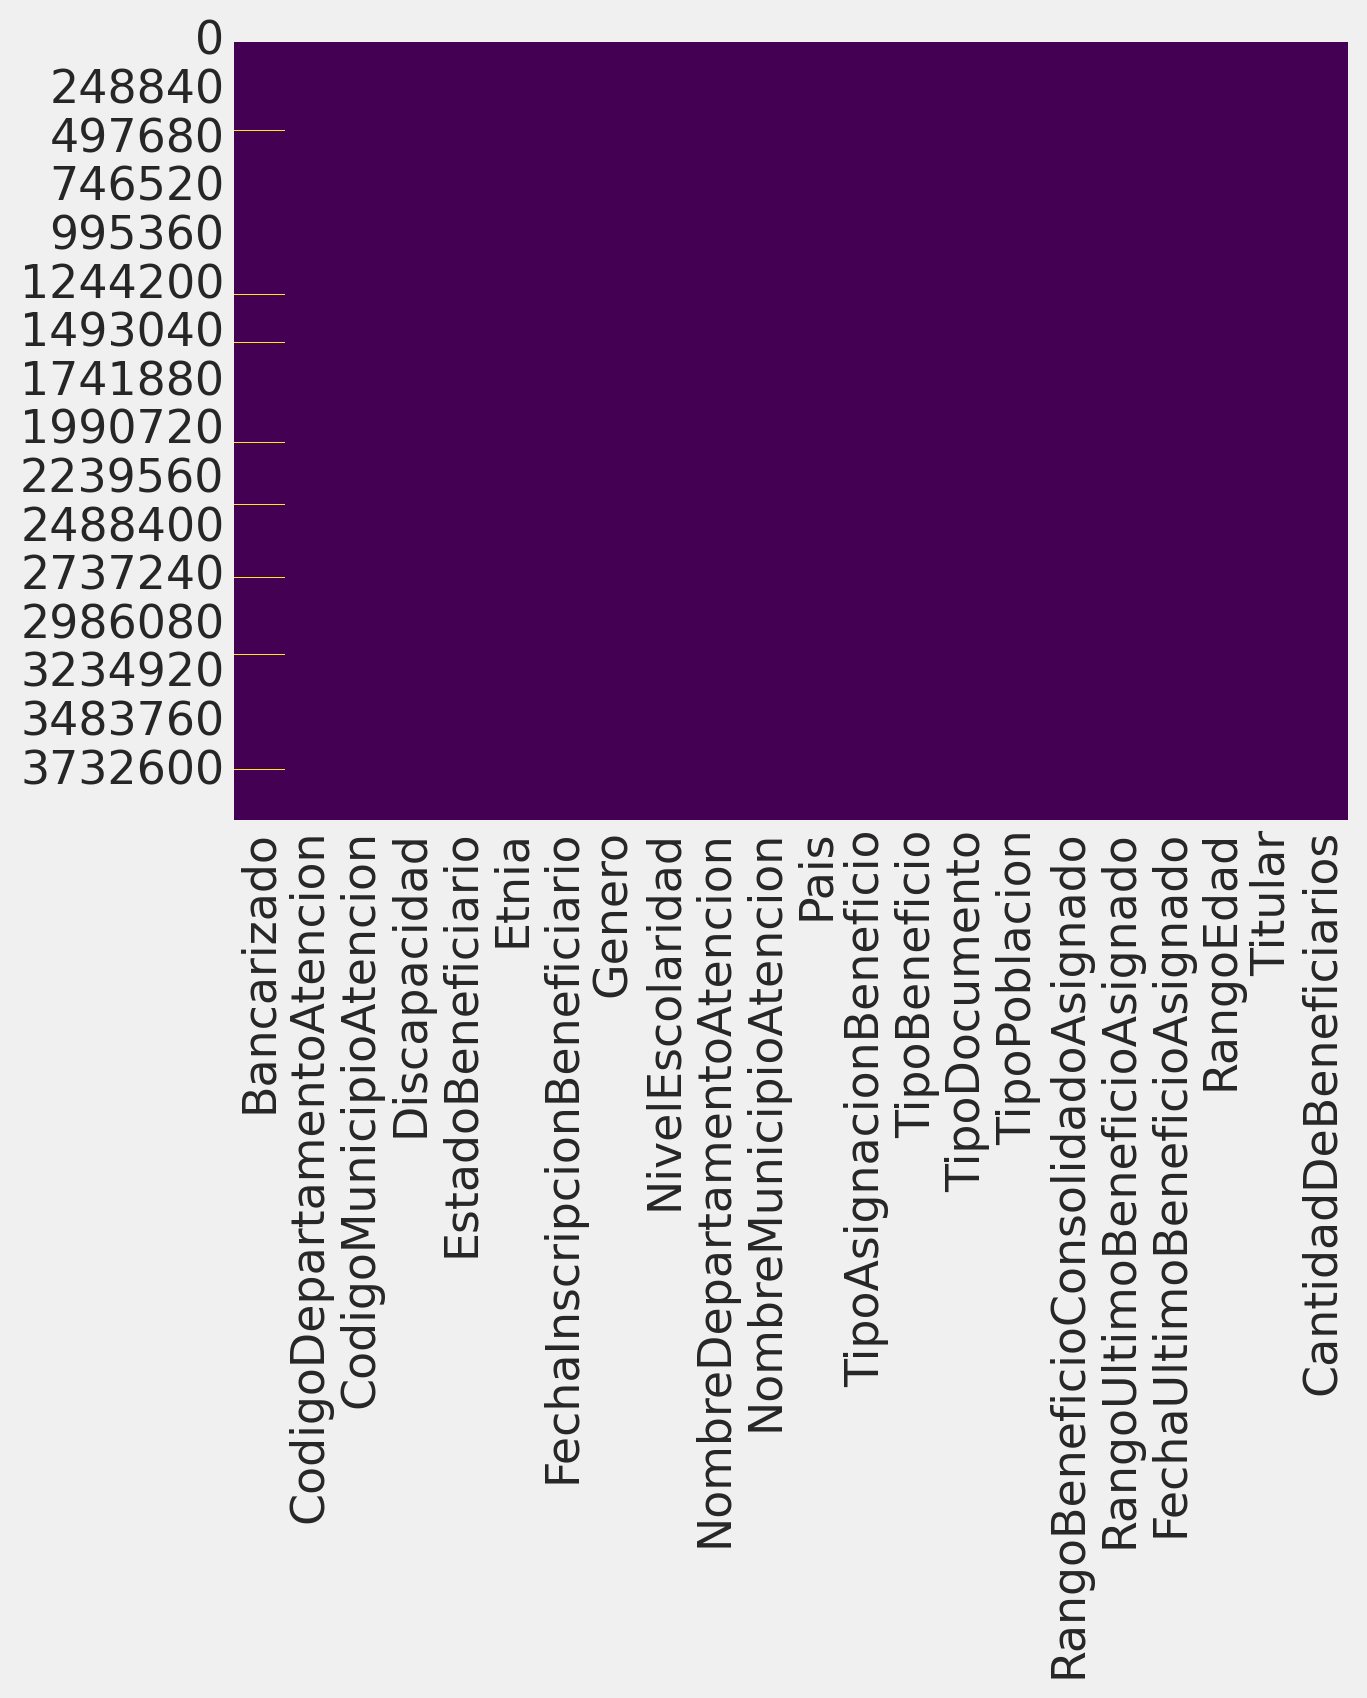

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

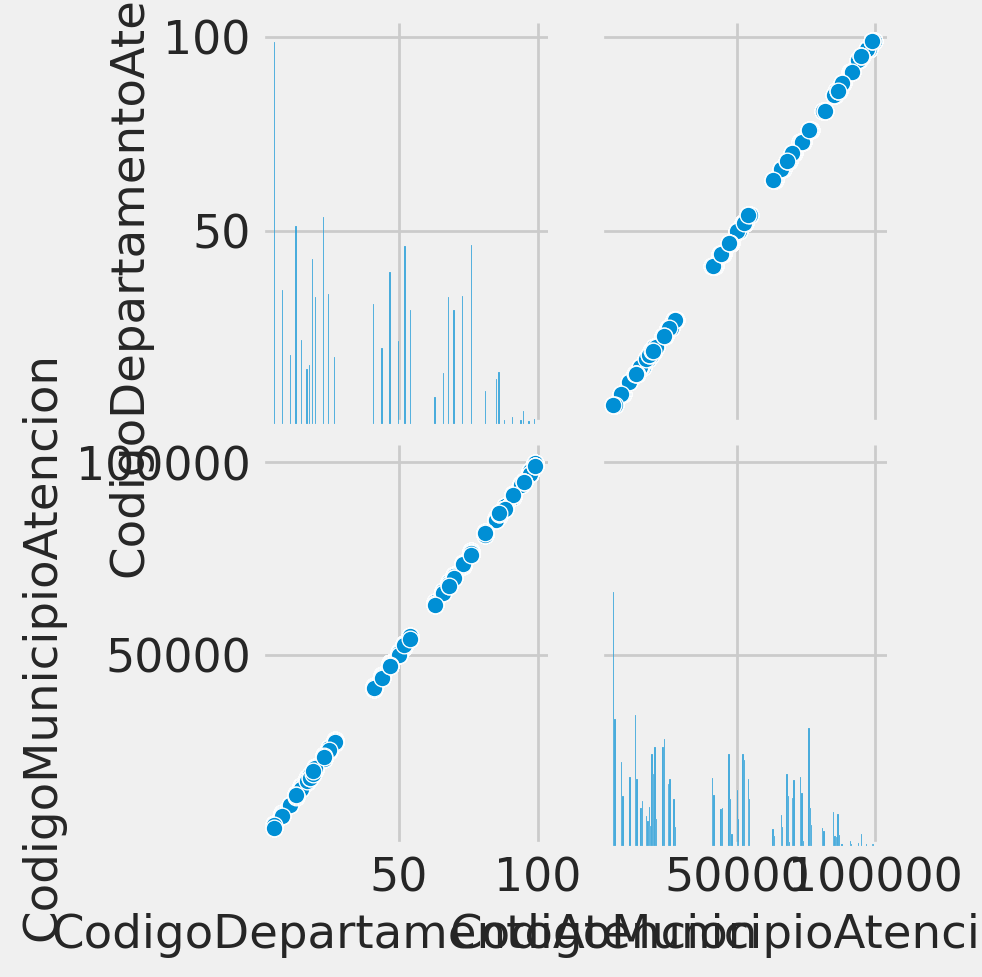

In [ ]:
sns.pairplot(df)

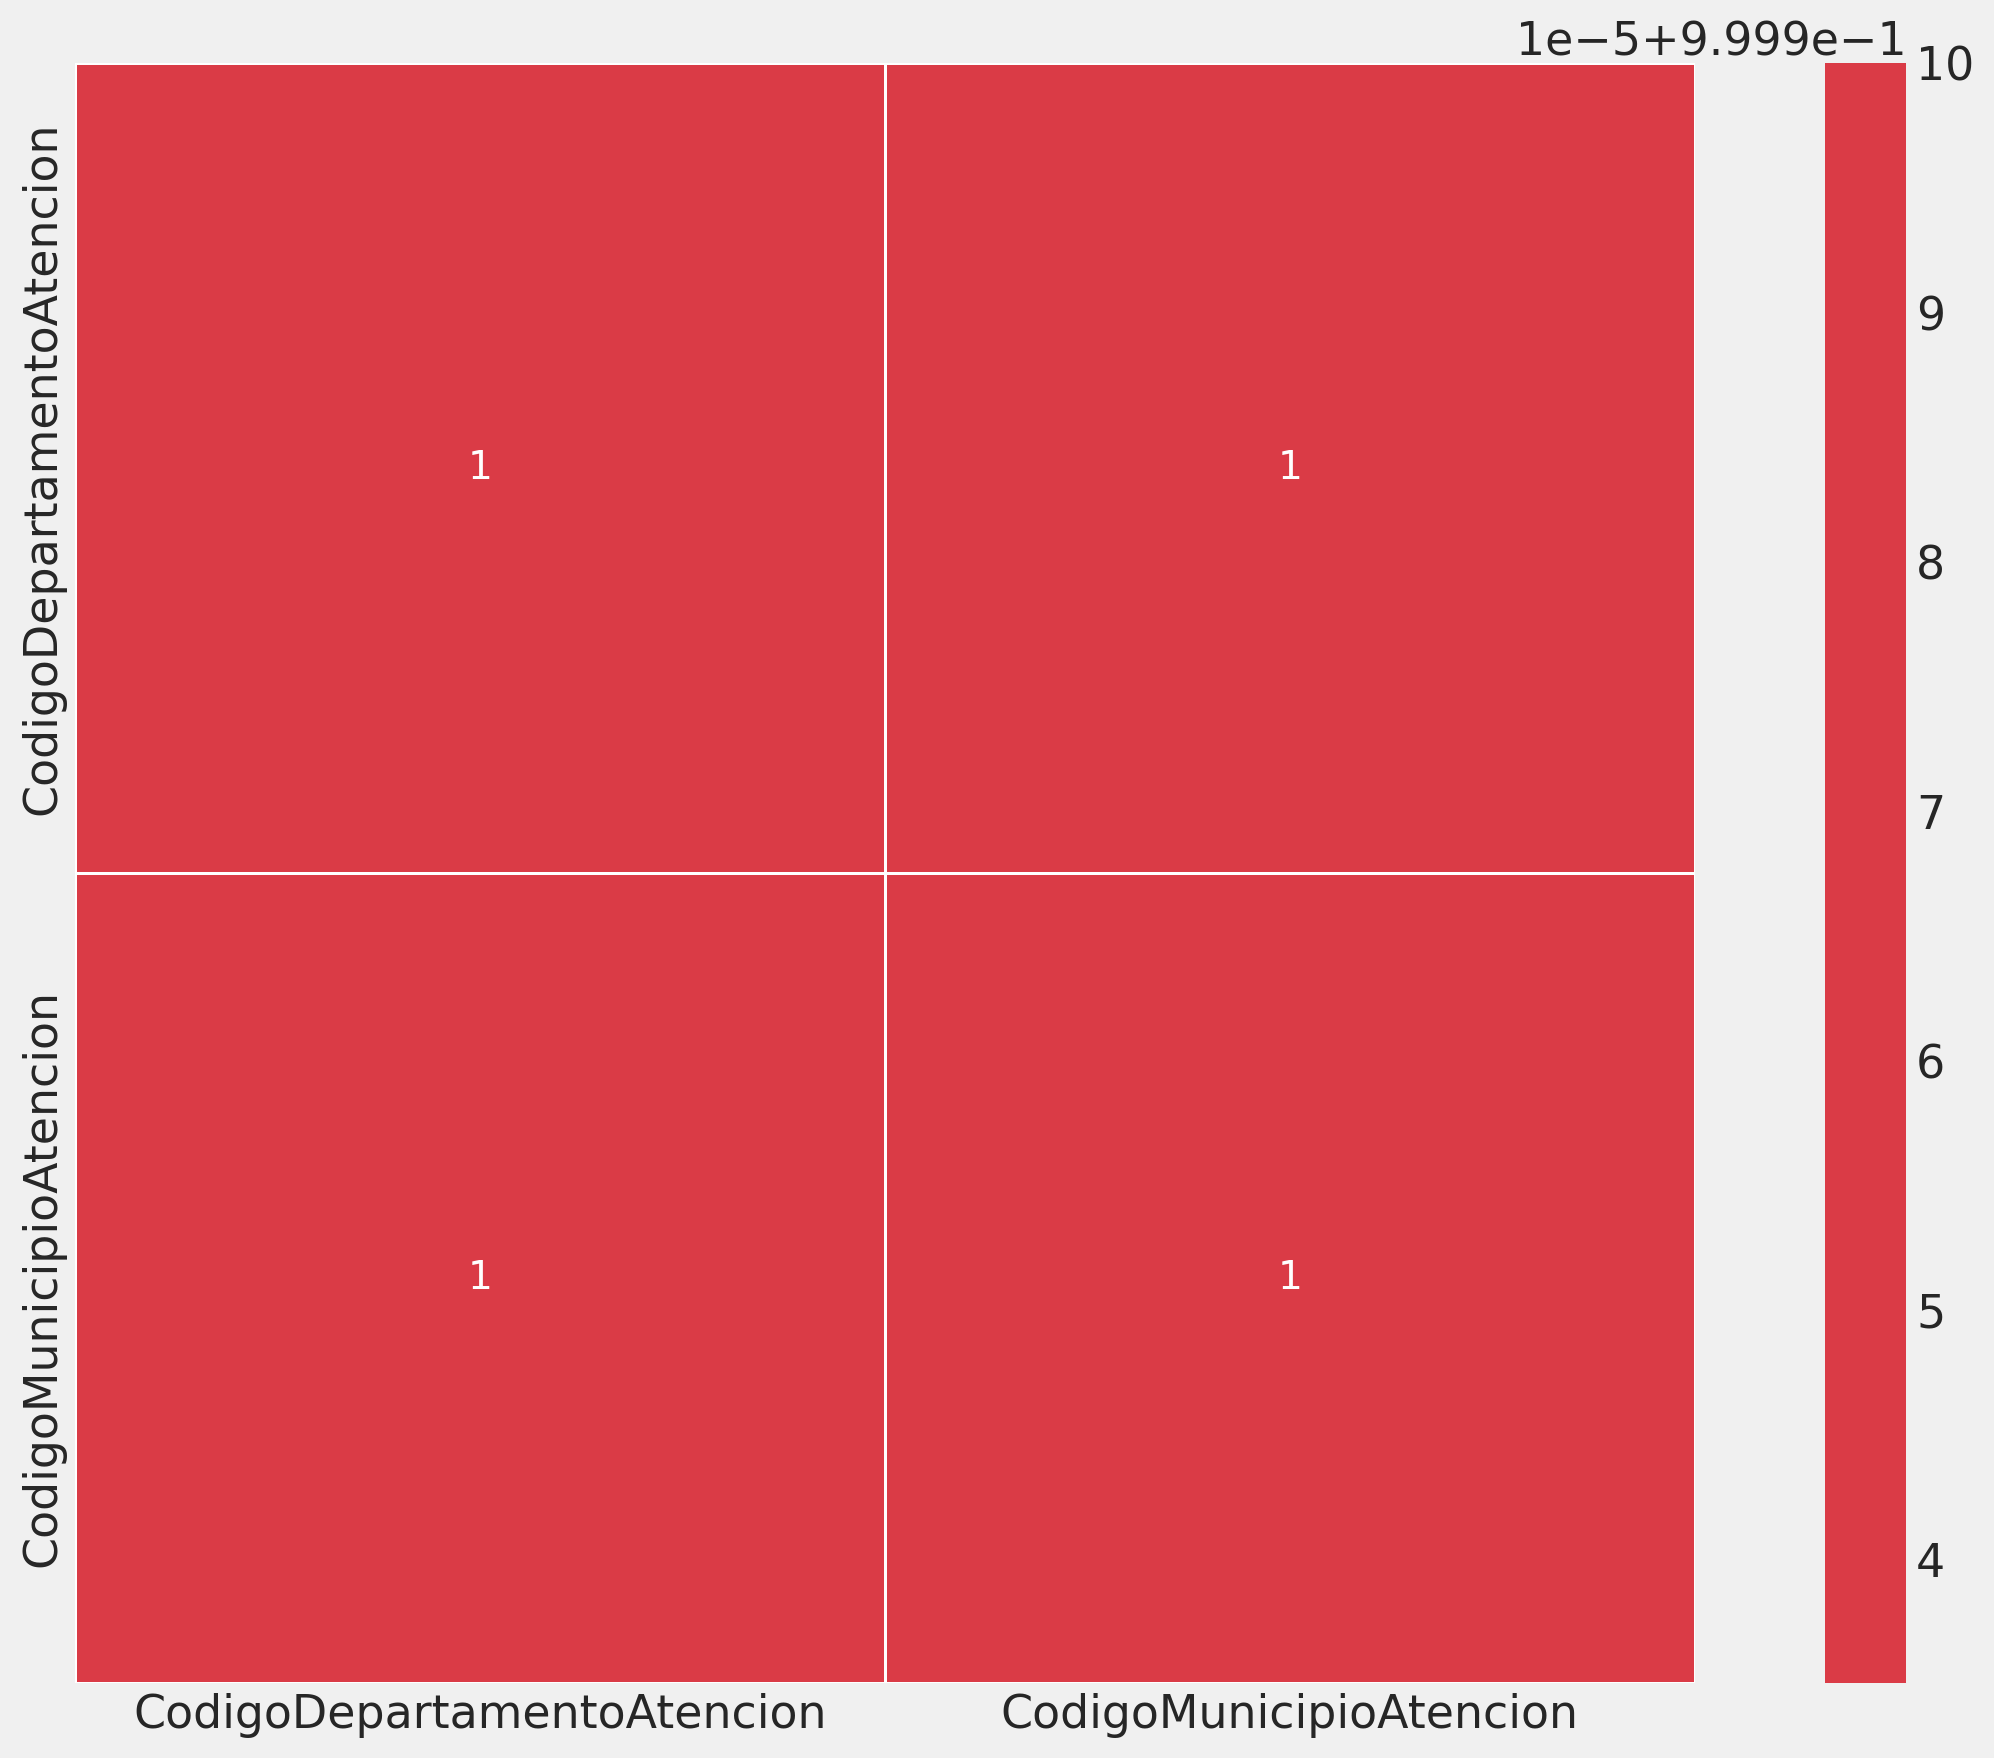

In [ ]:
data_corr = df.corr()  # Pearson correlation
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(data_corr, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

KeyboardInterrupt: ignored

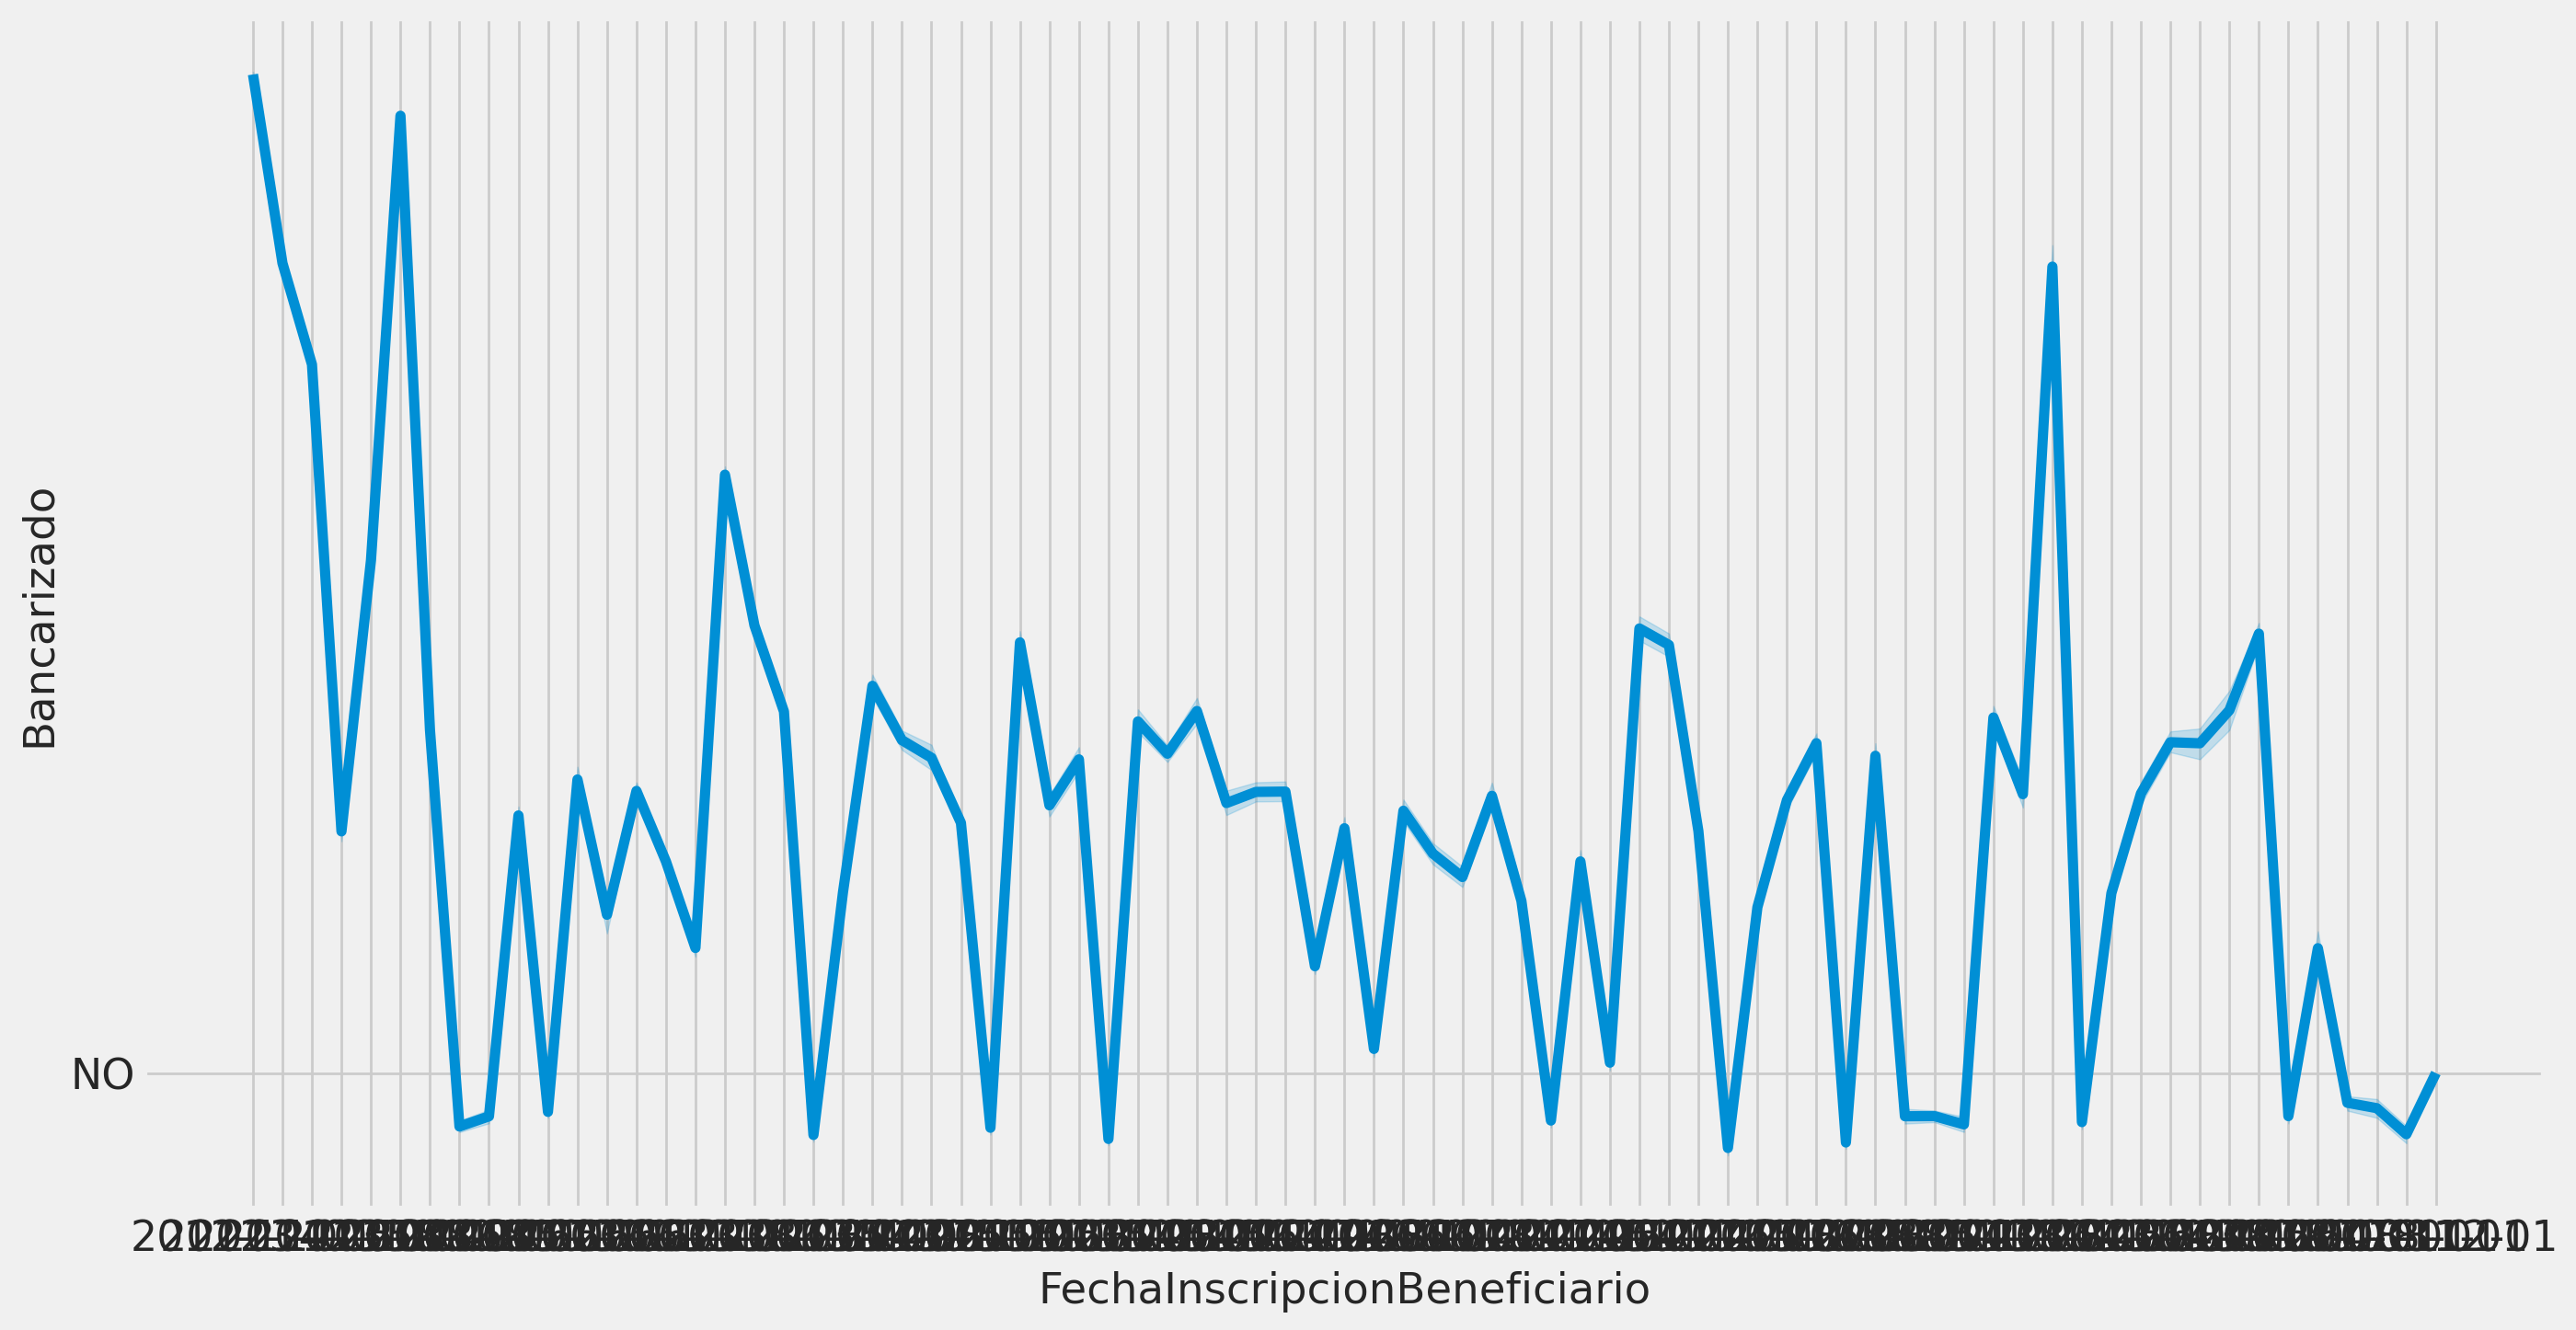

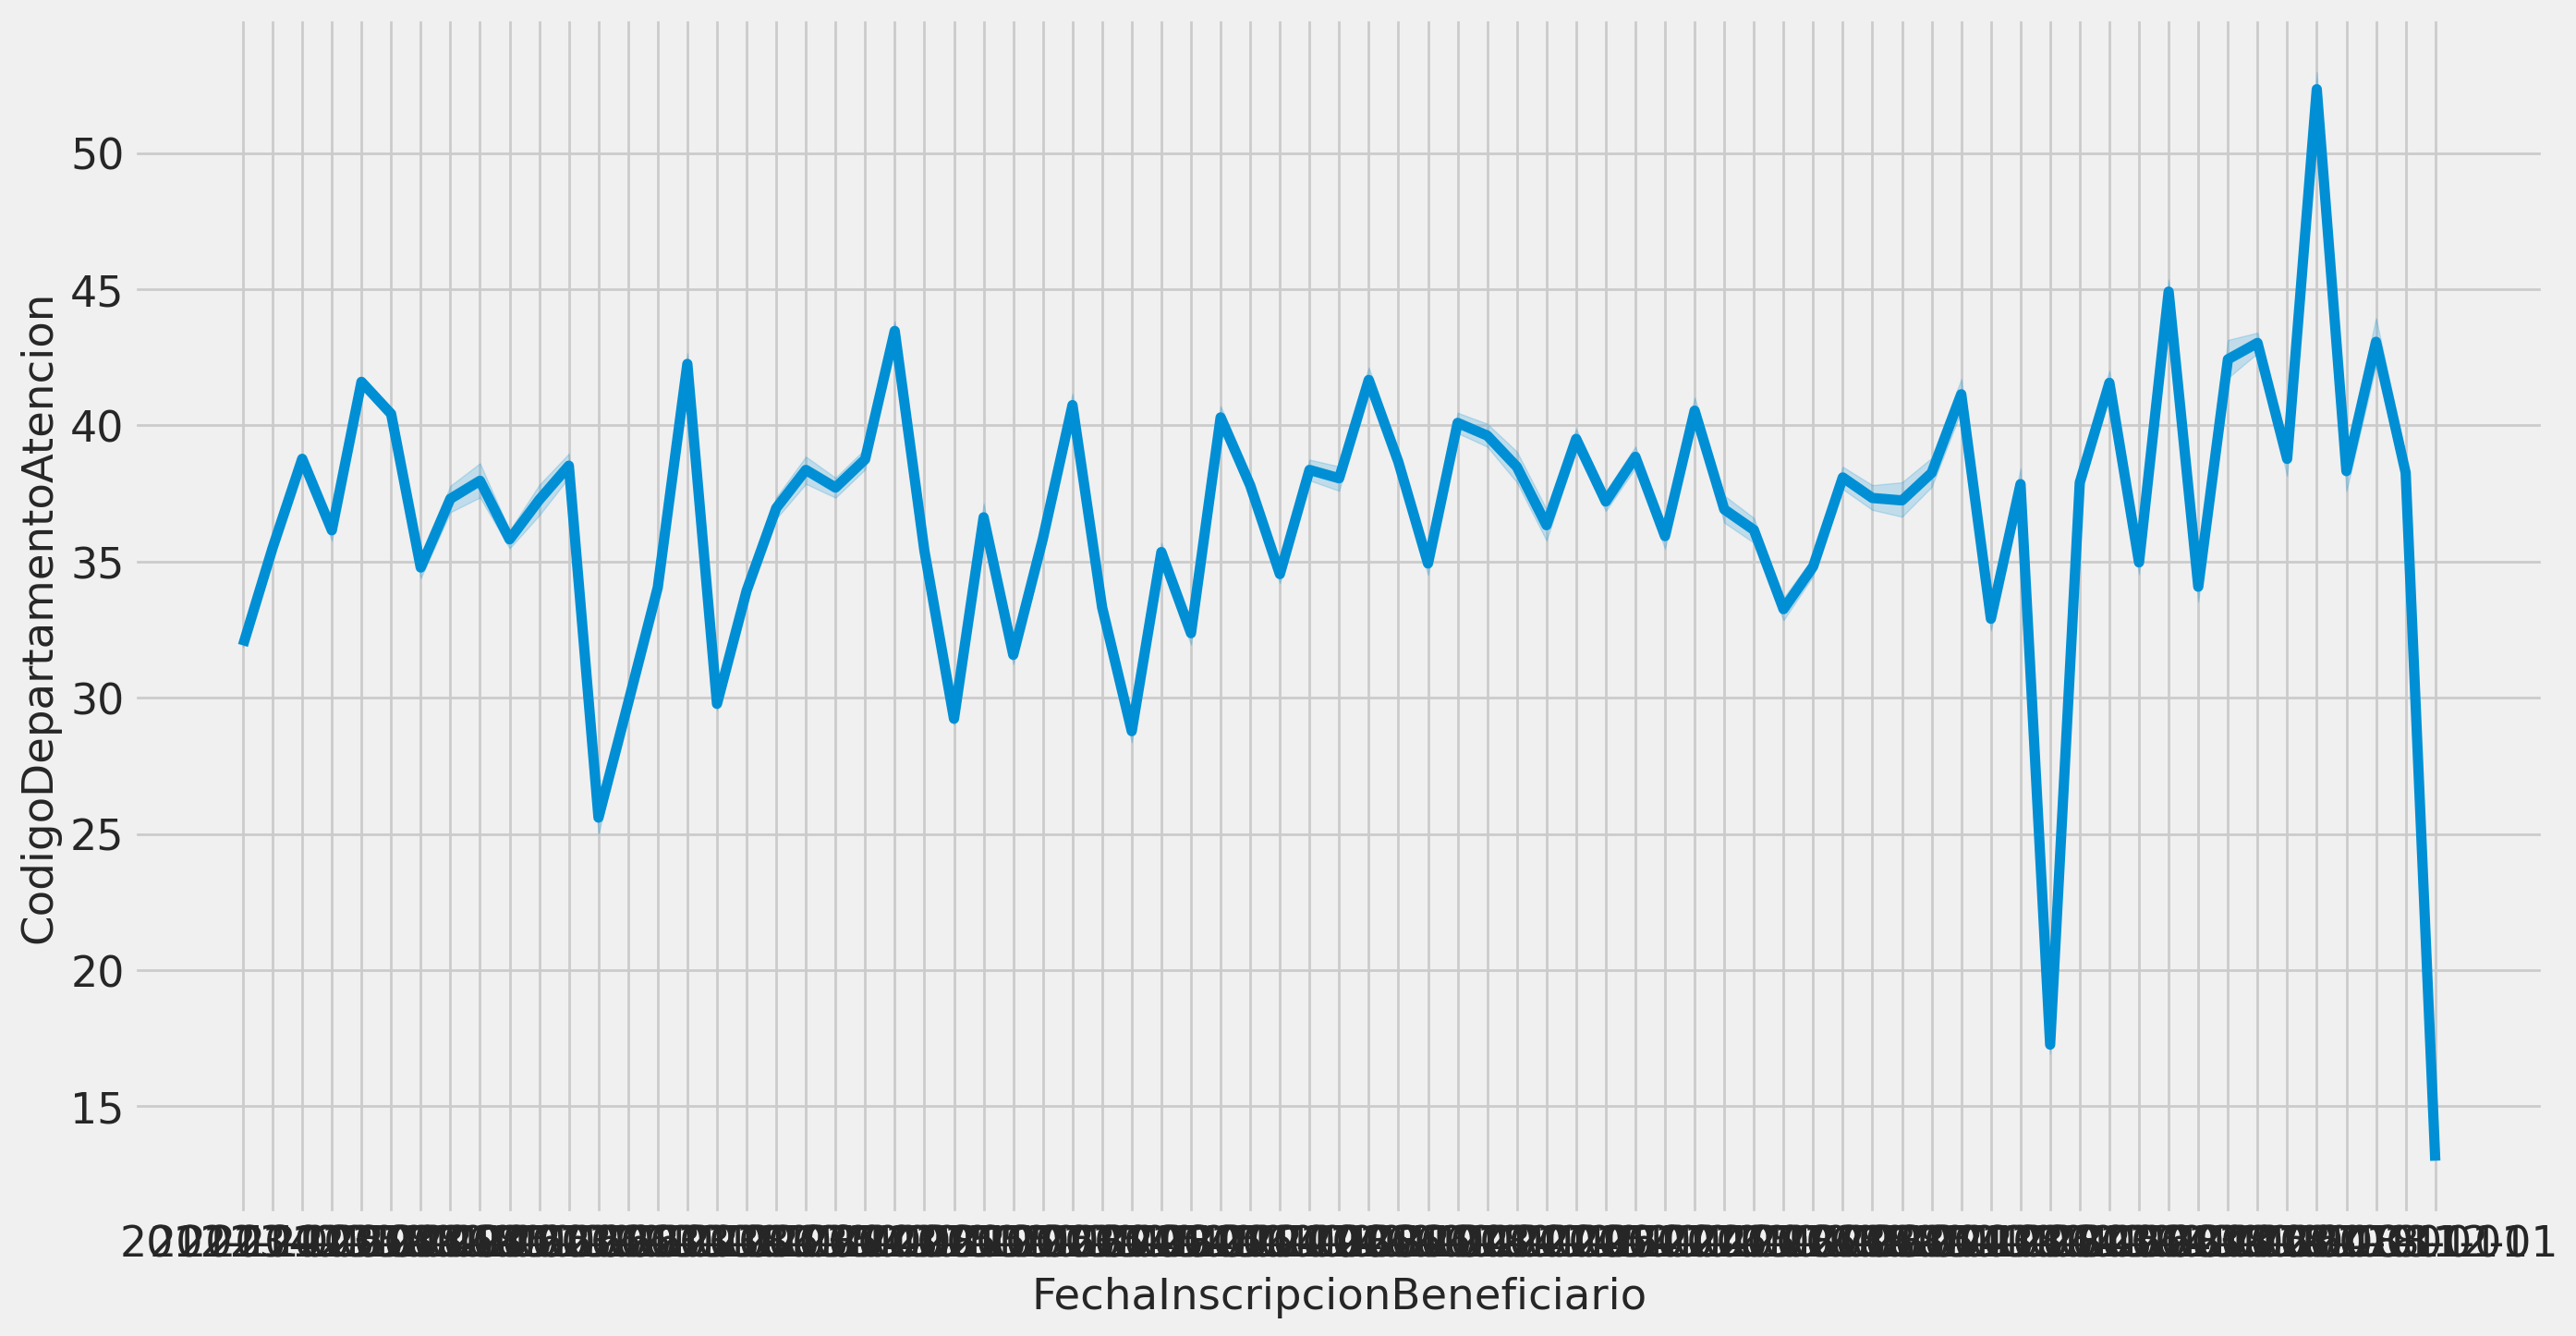

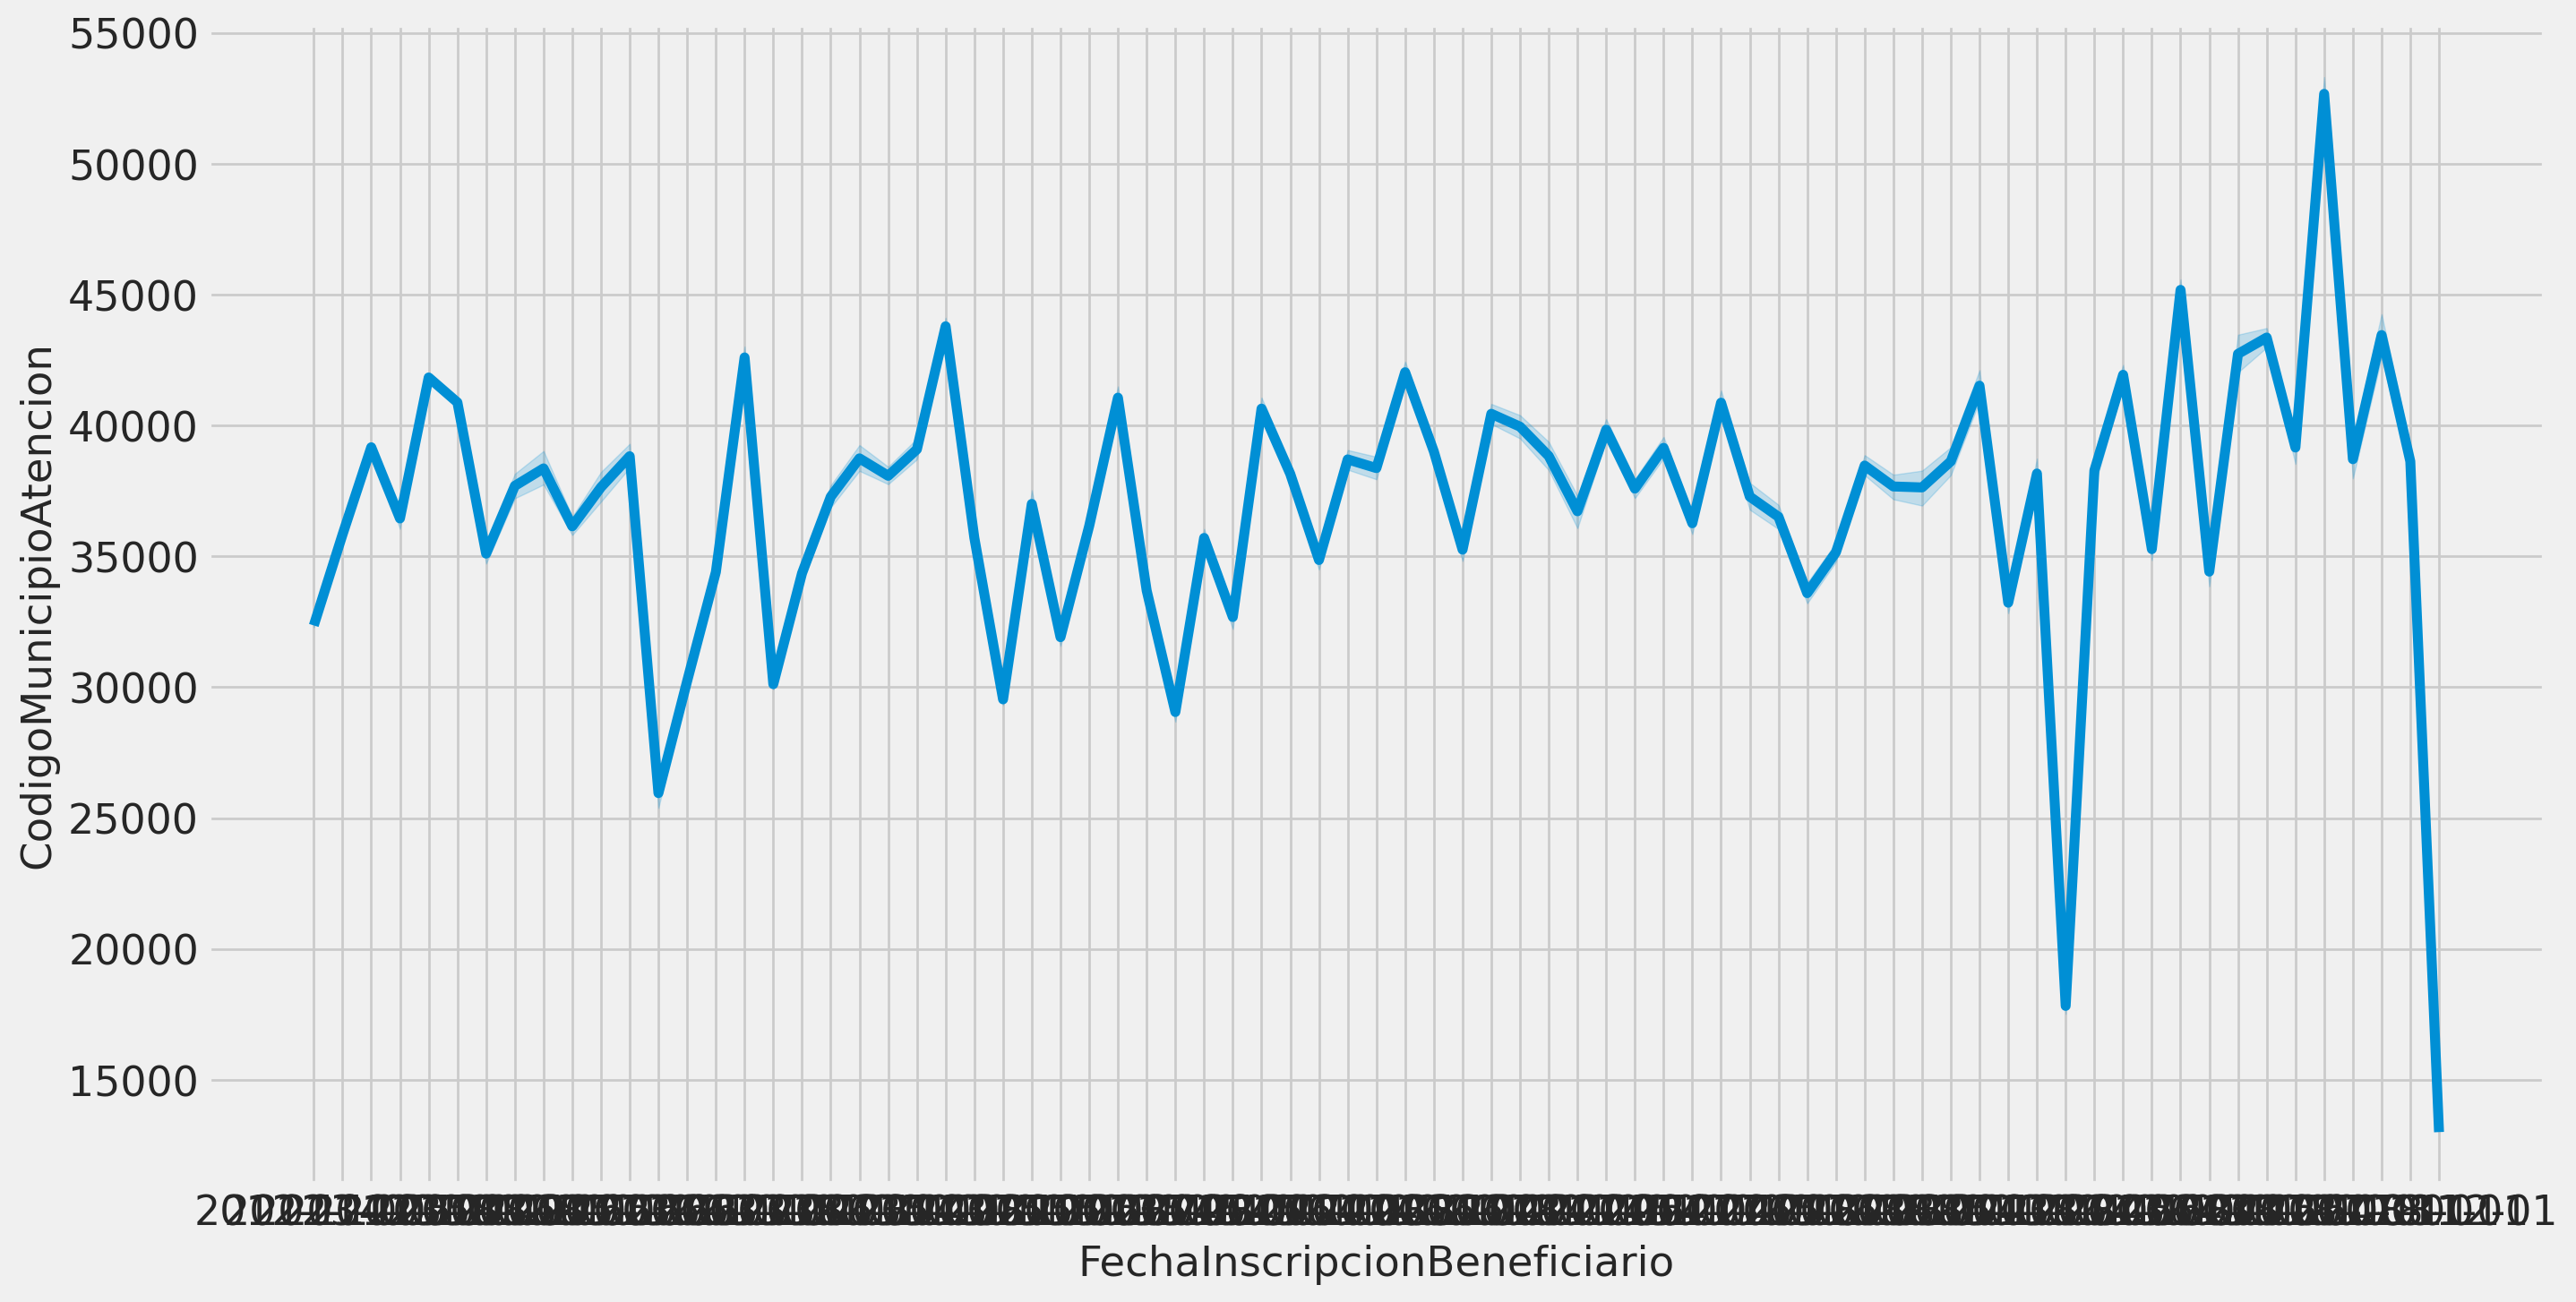

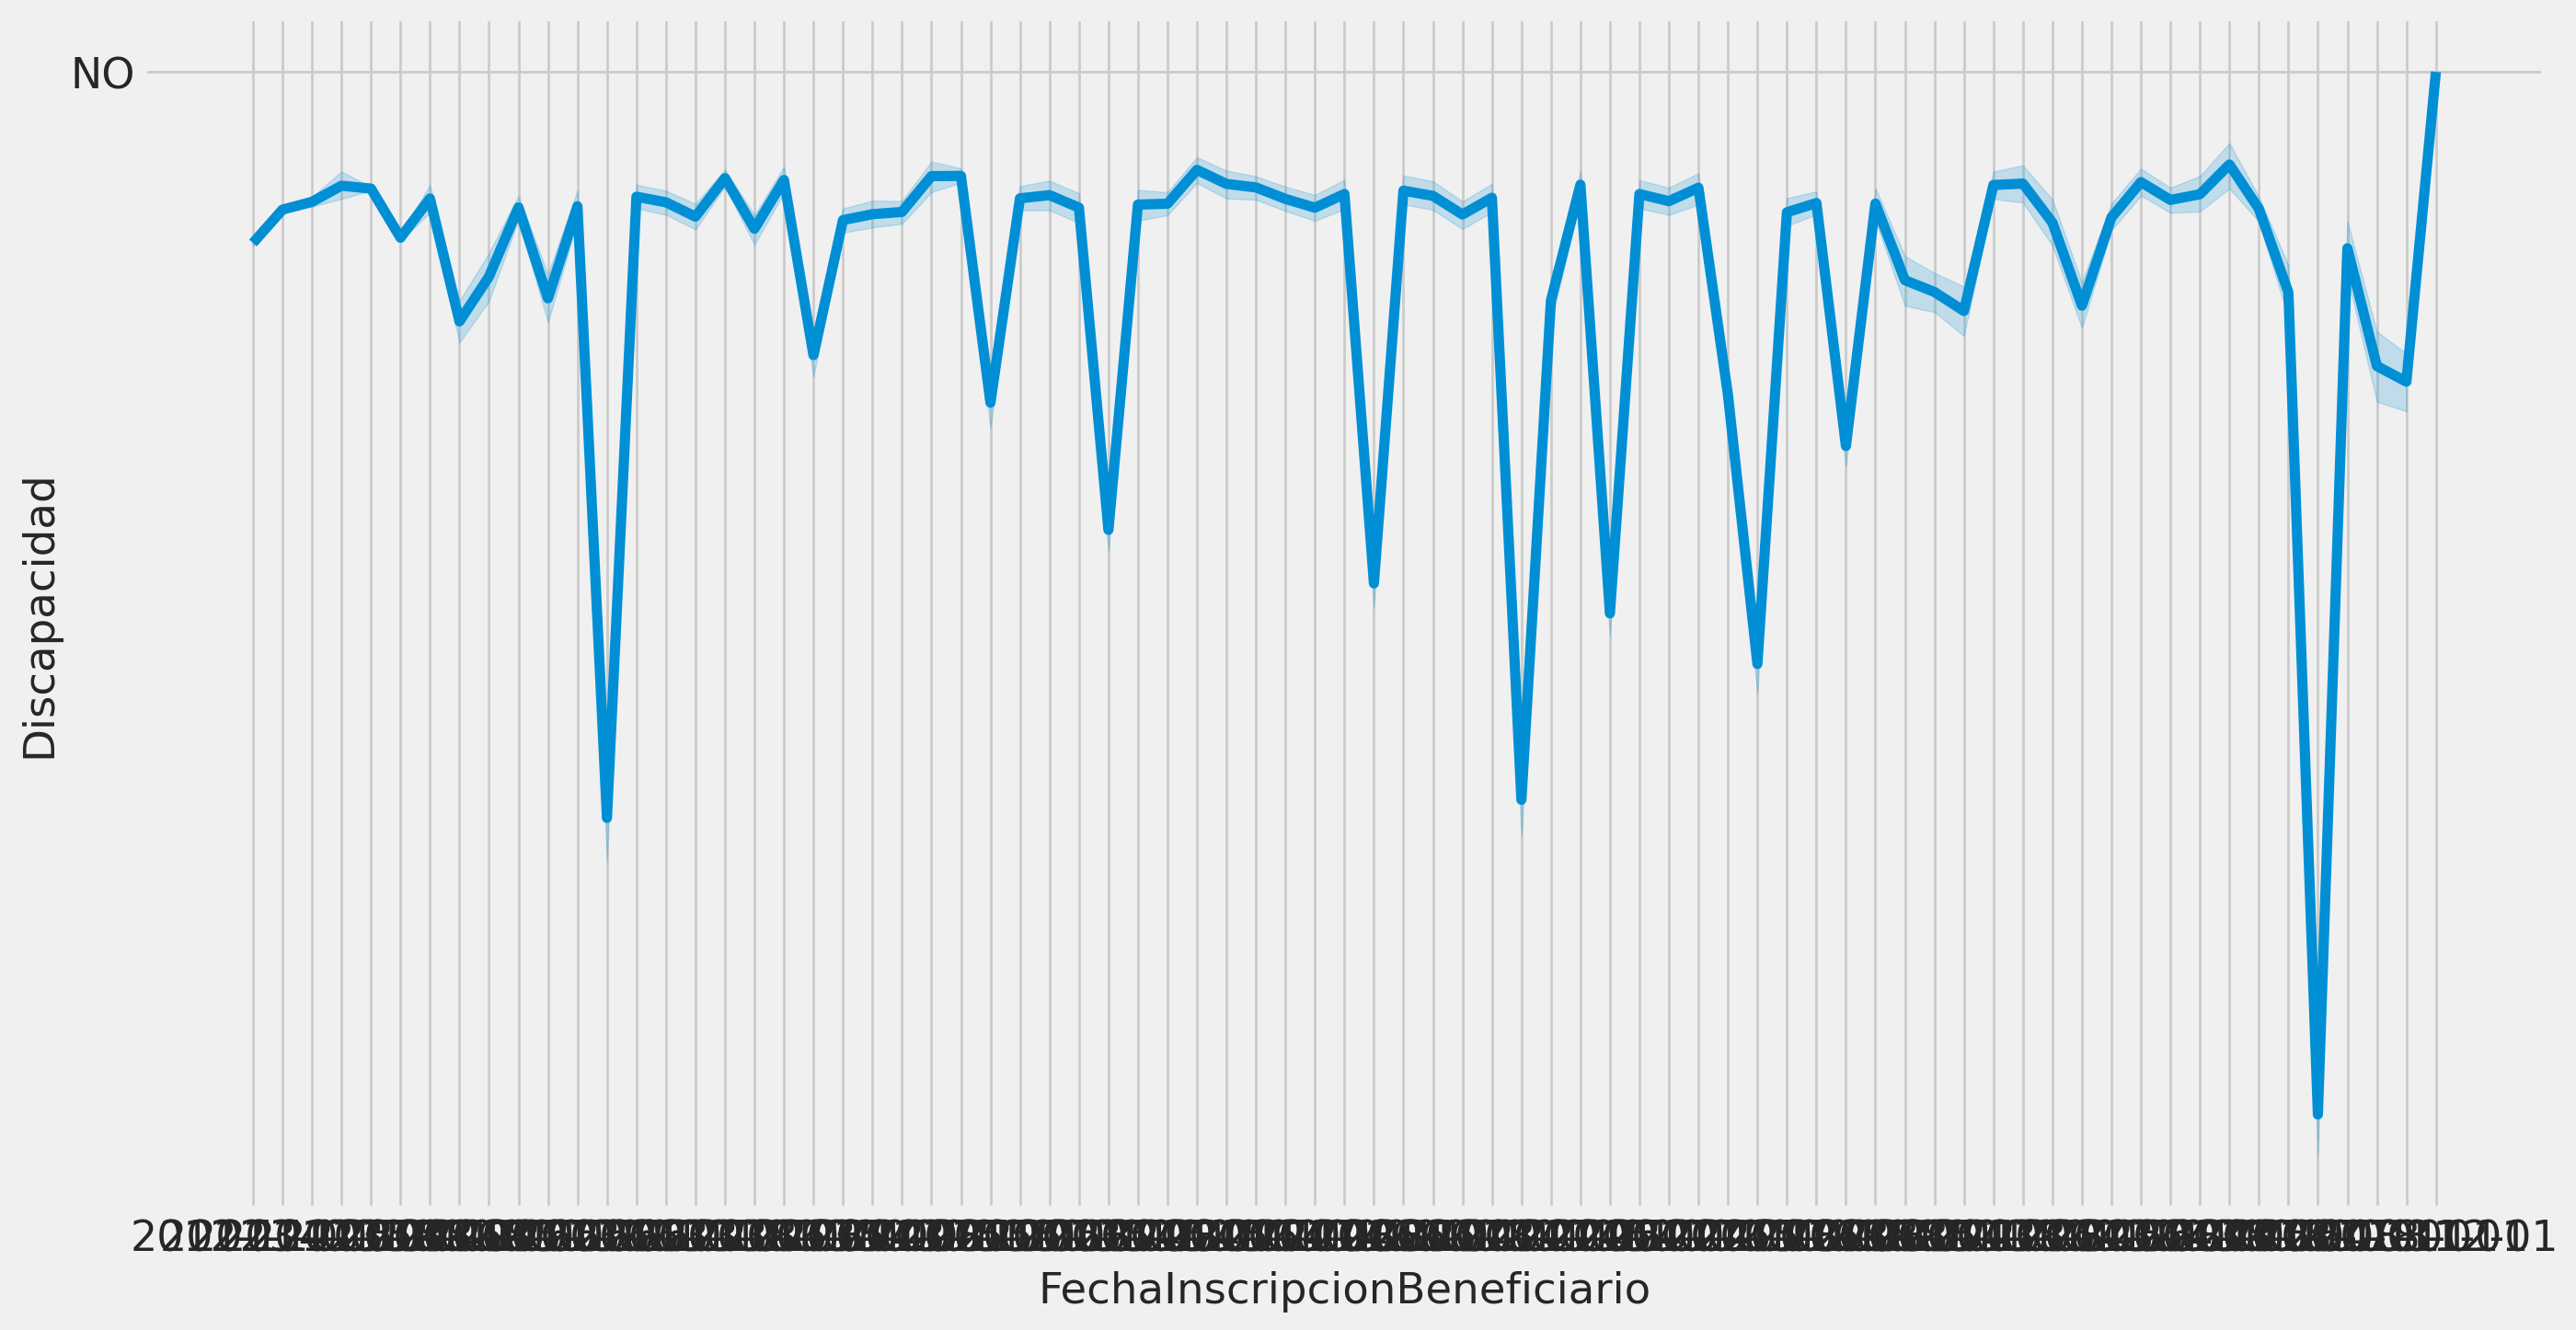

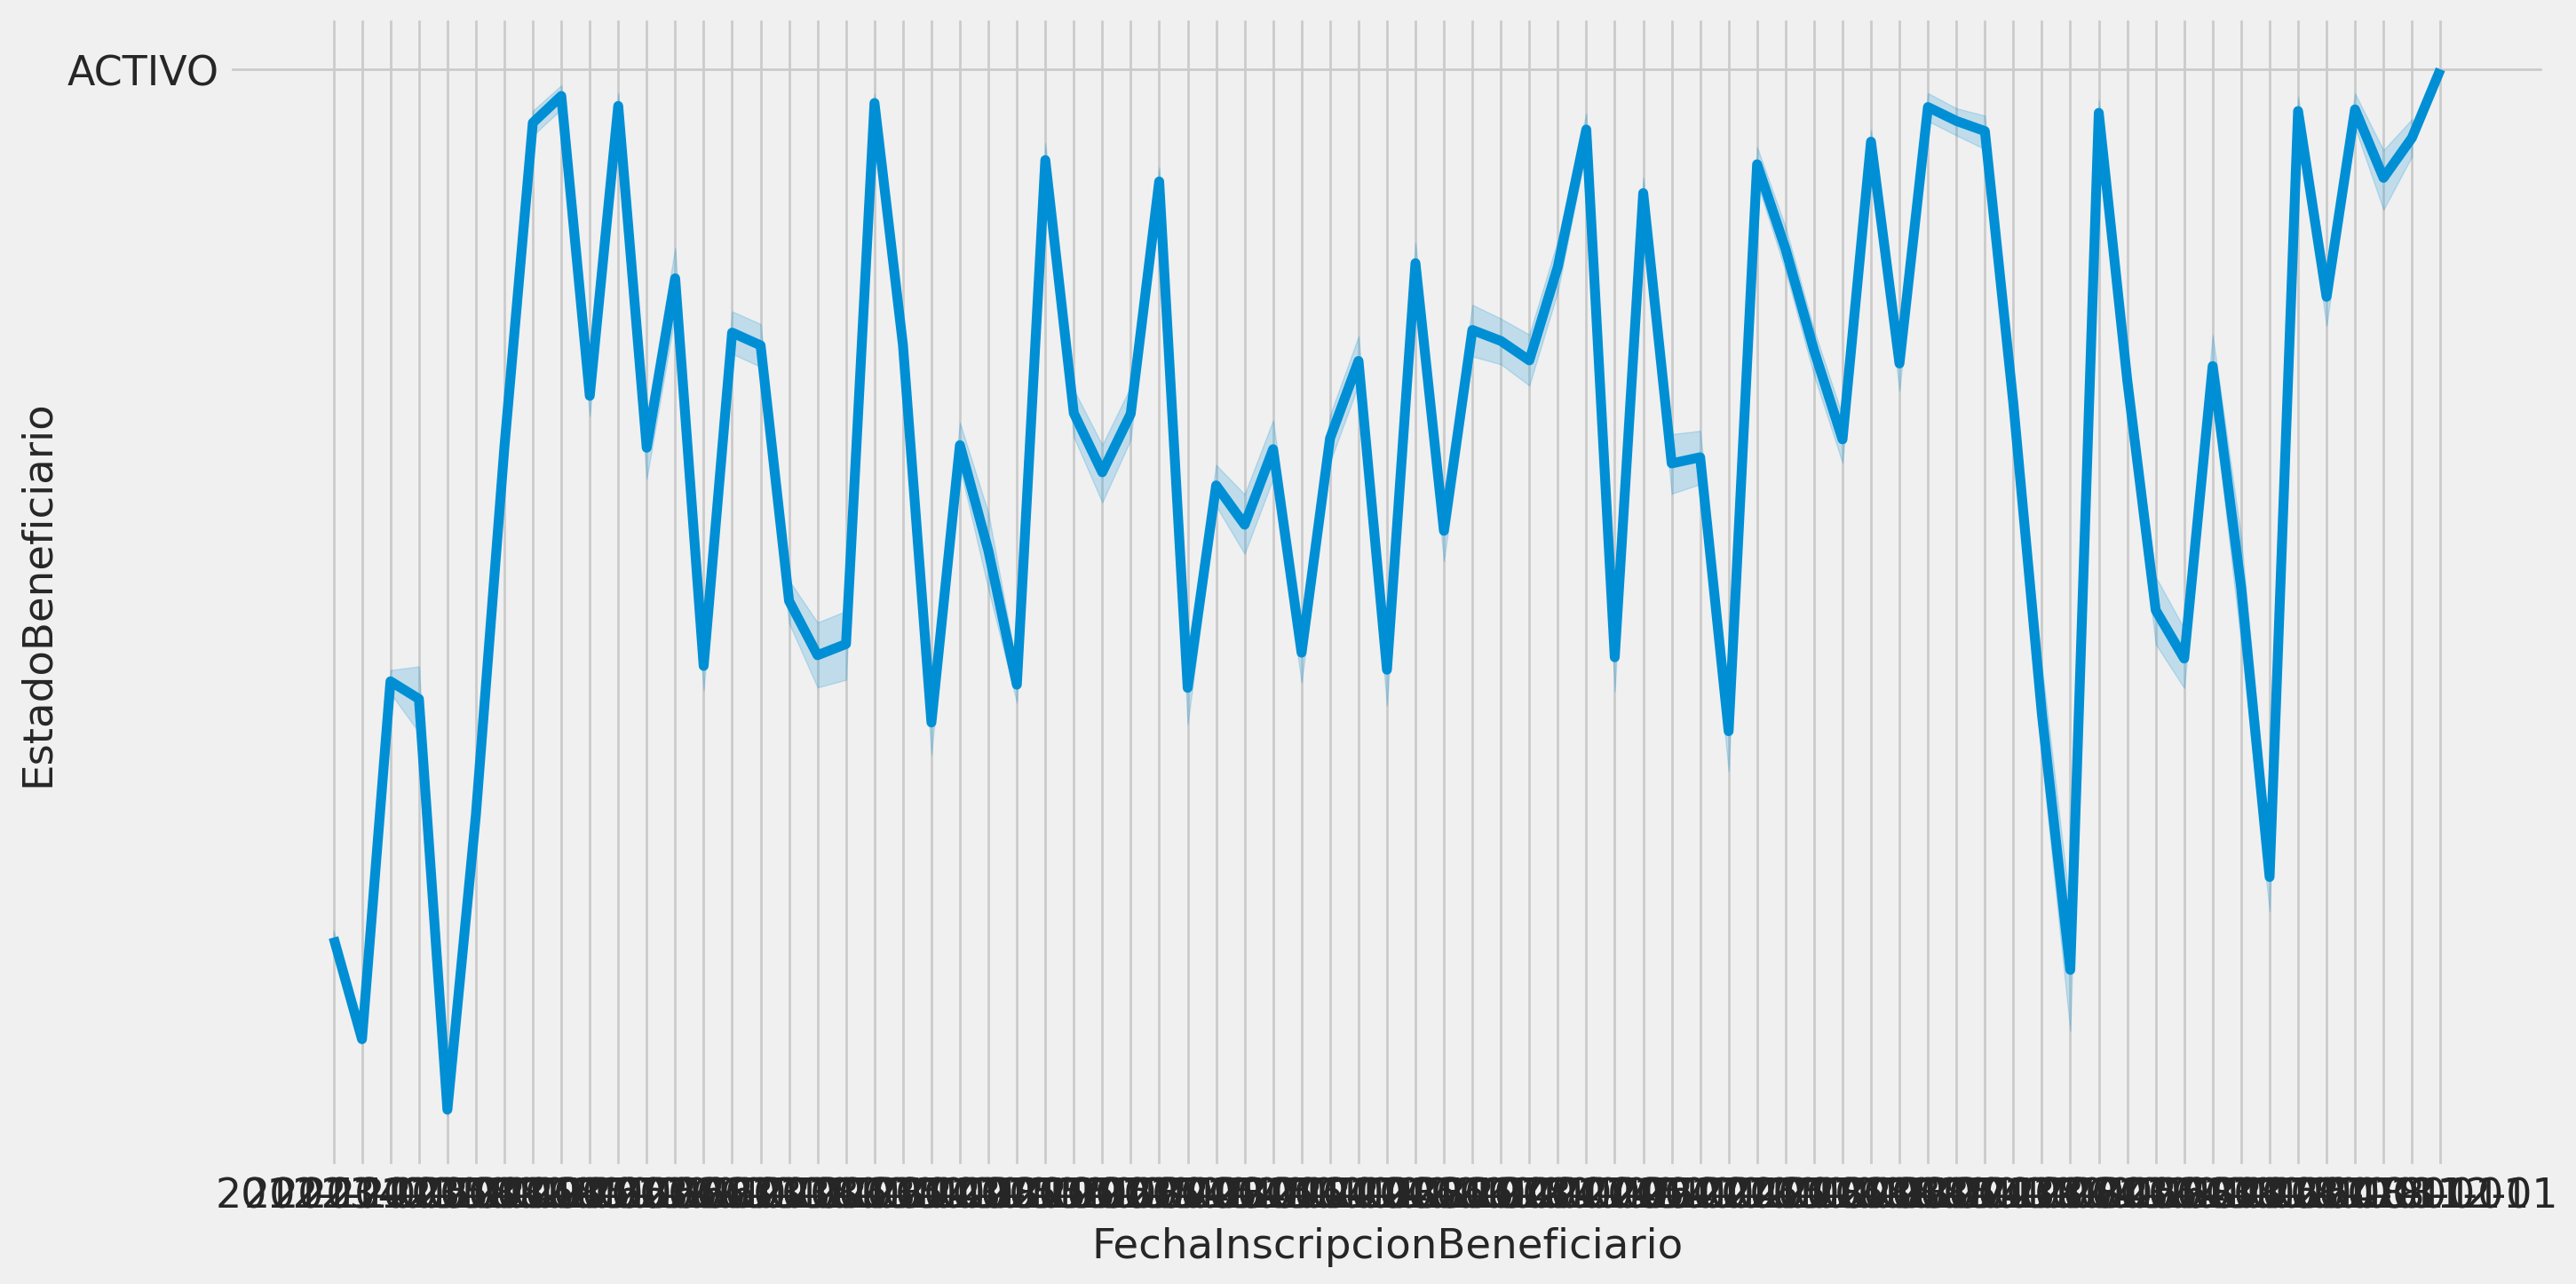

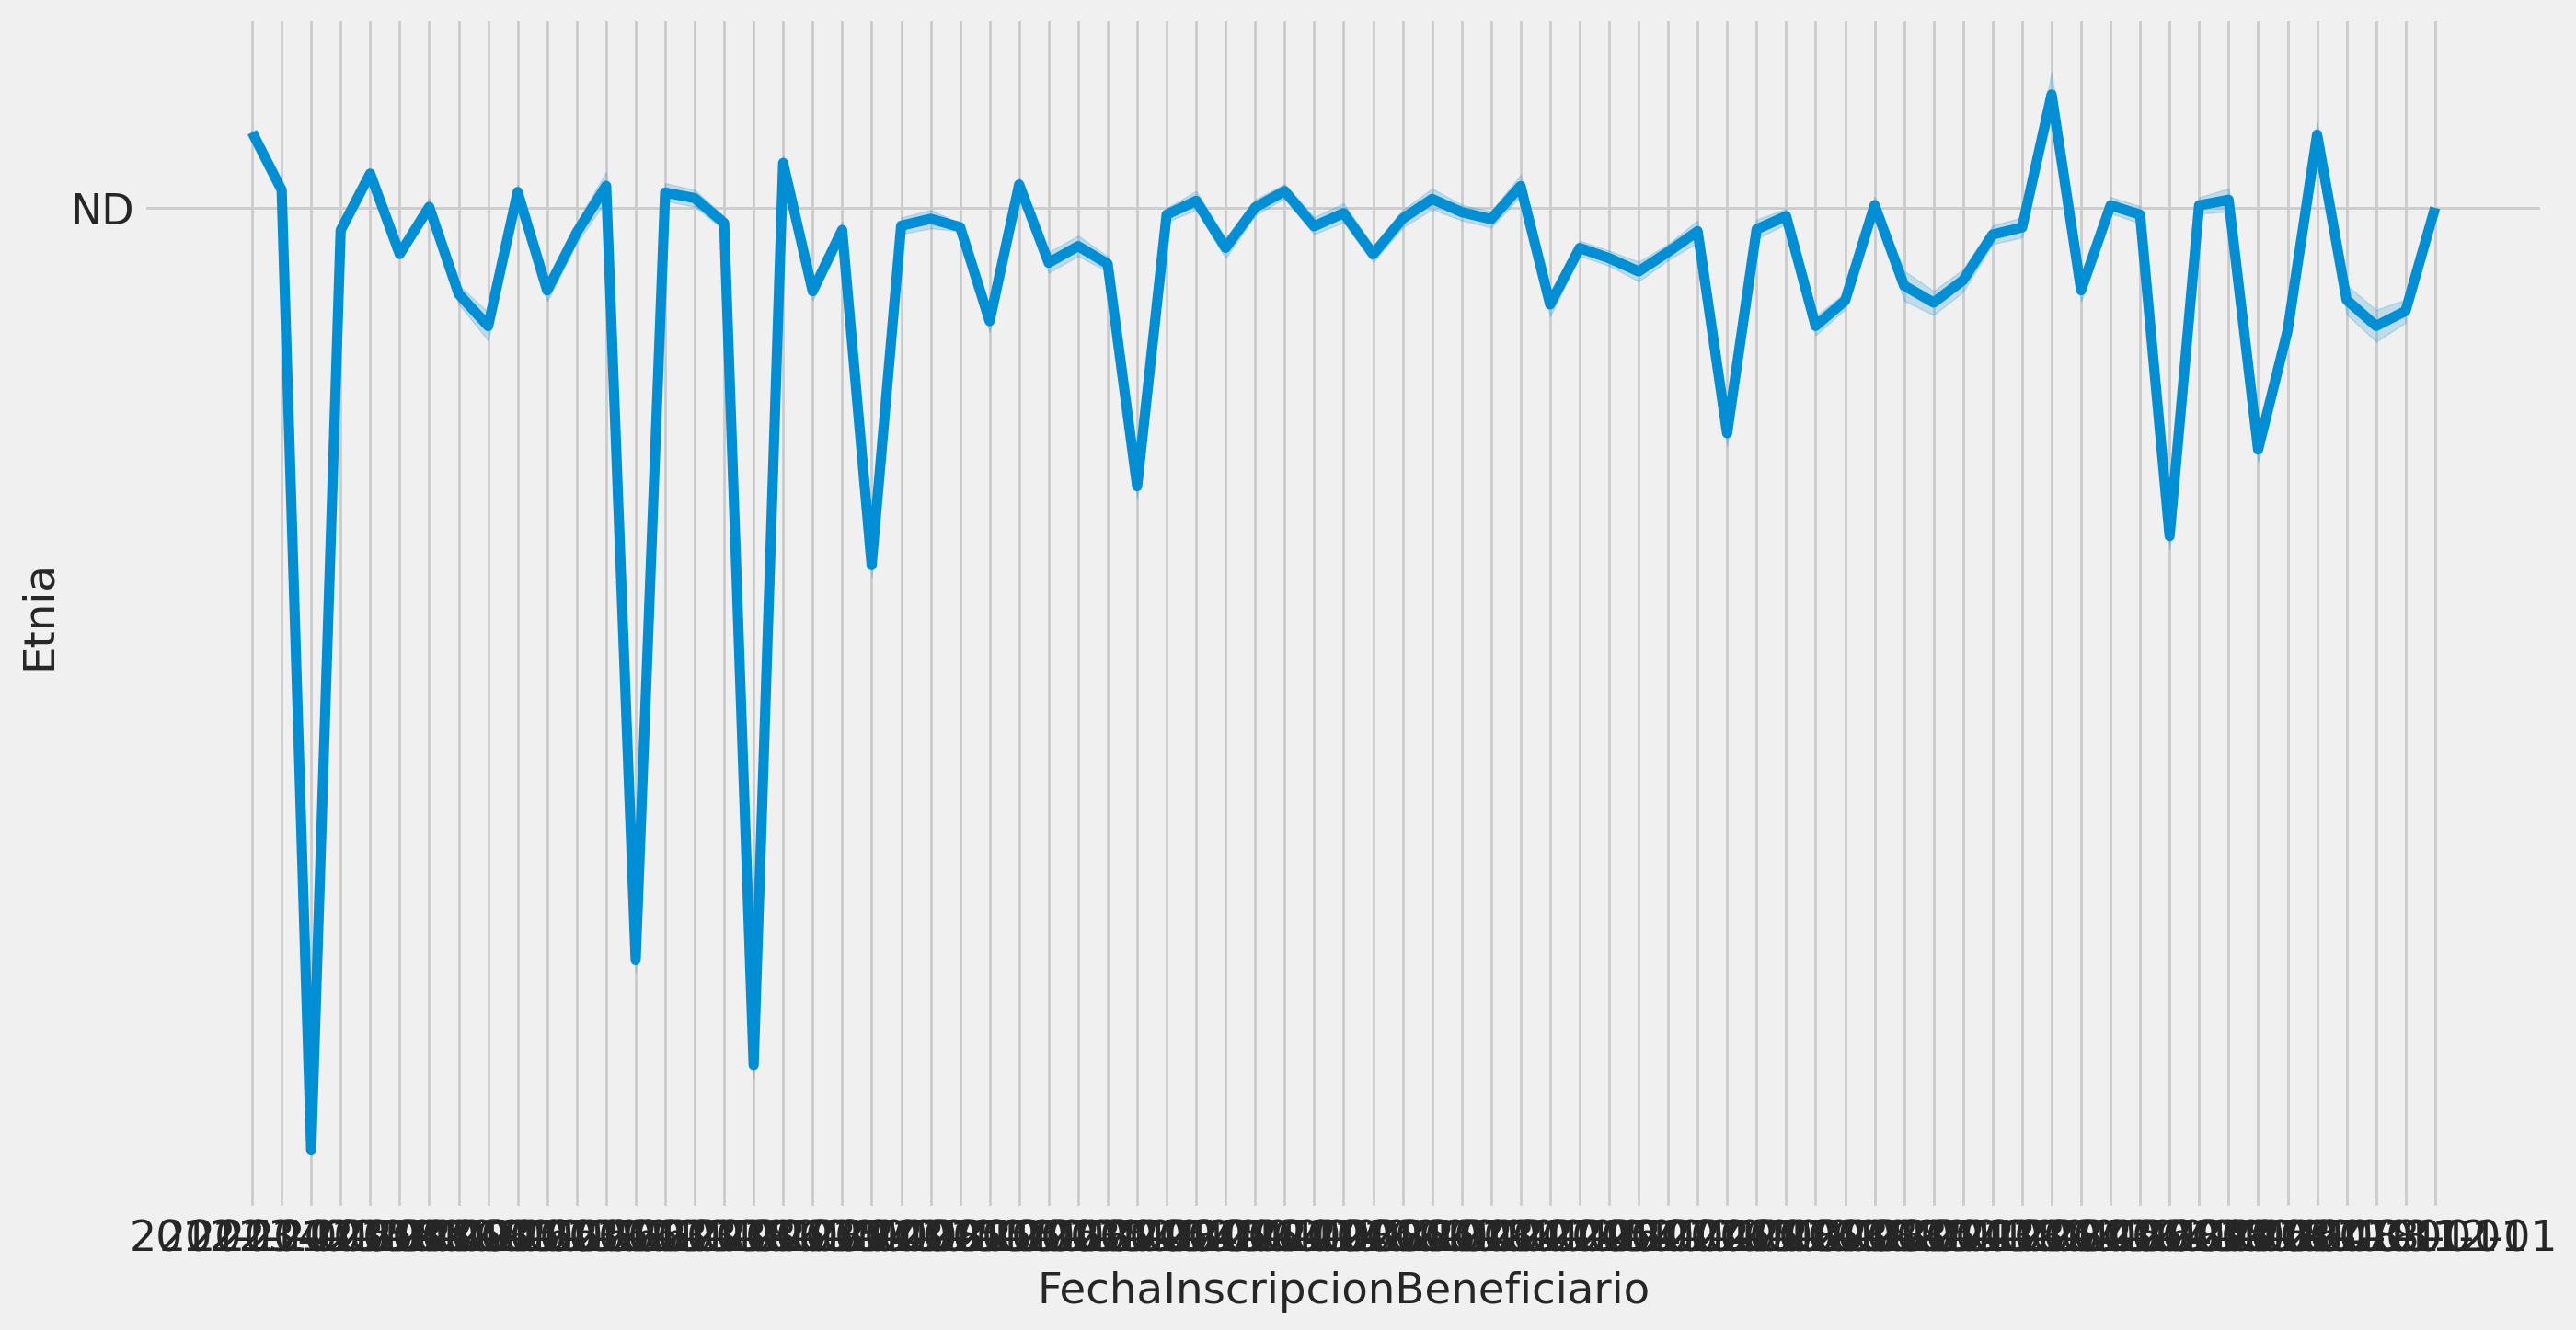

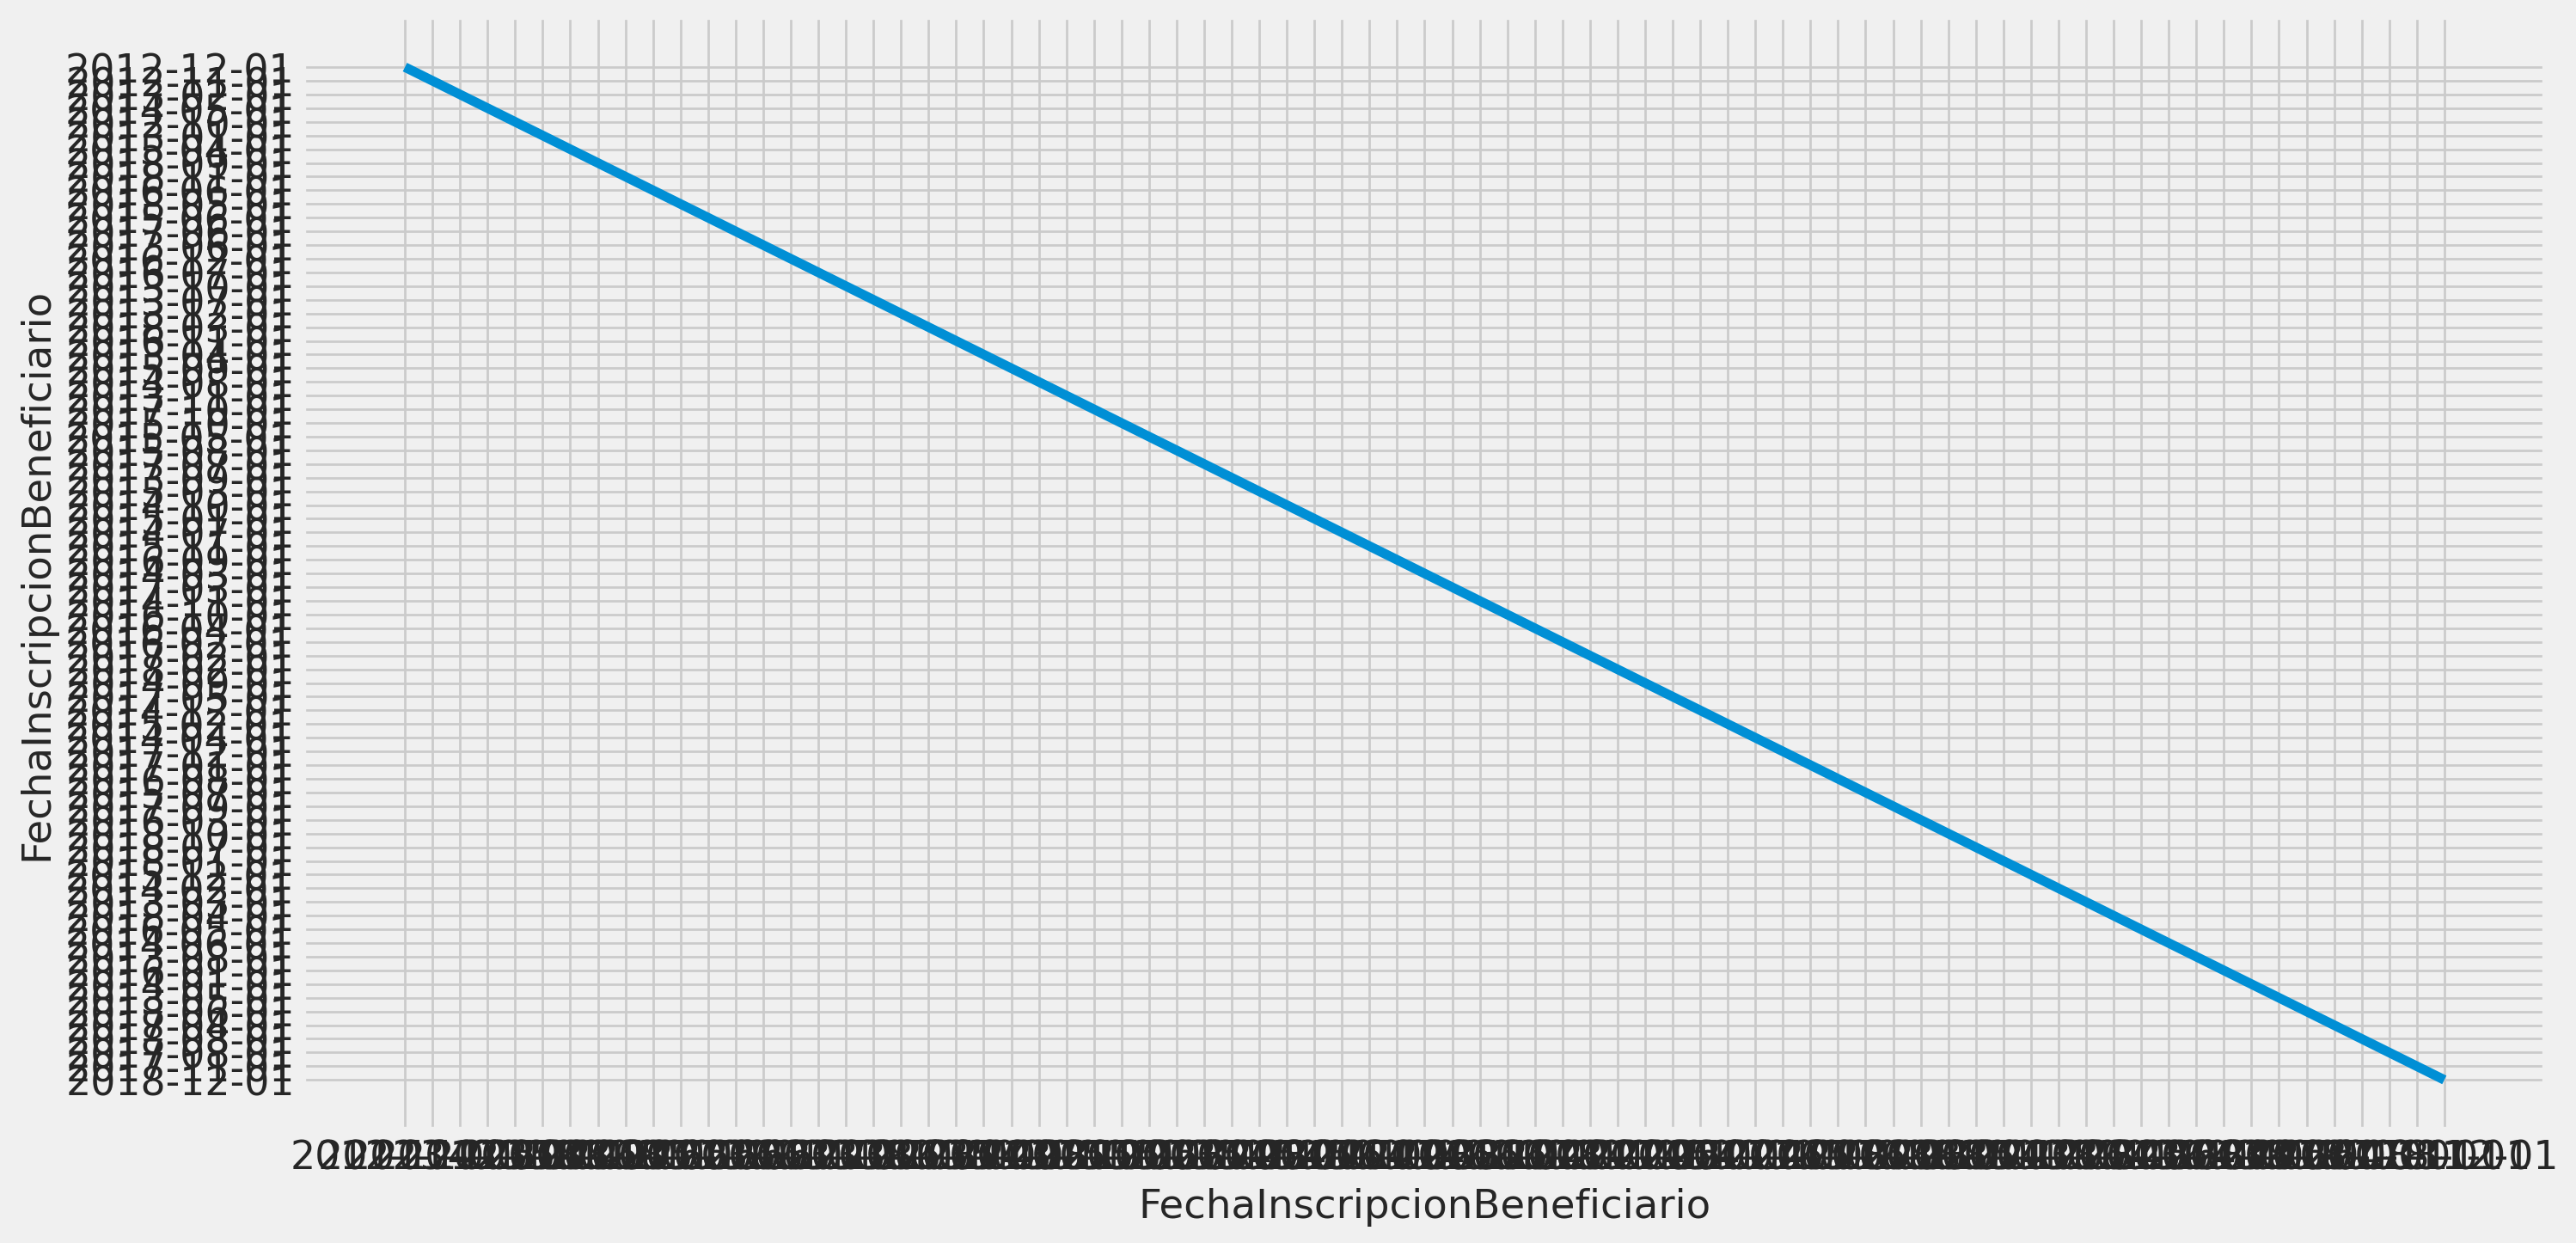

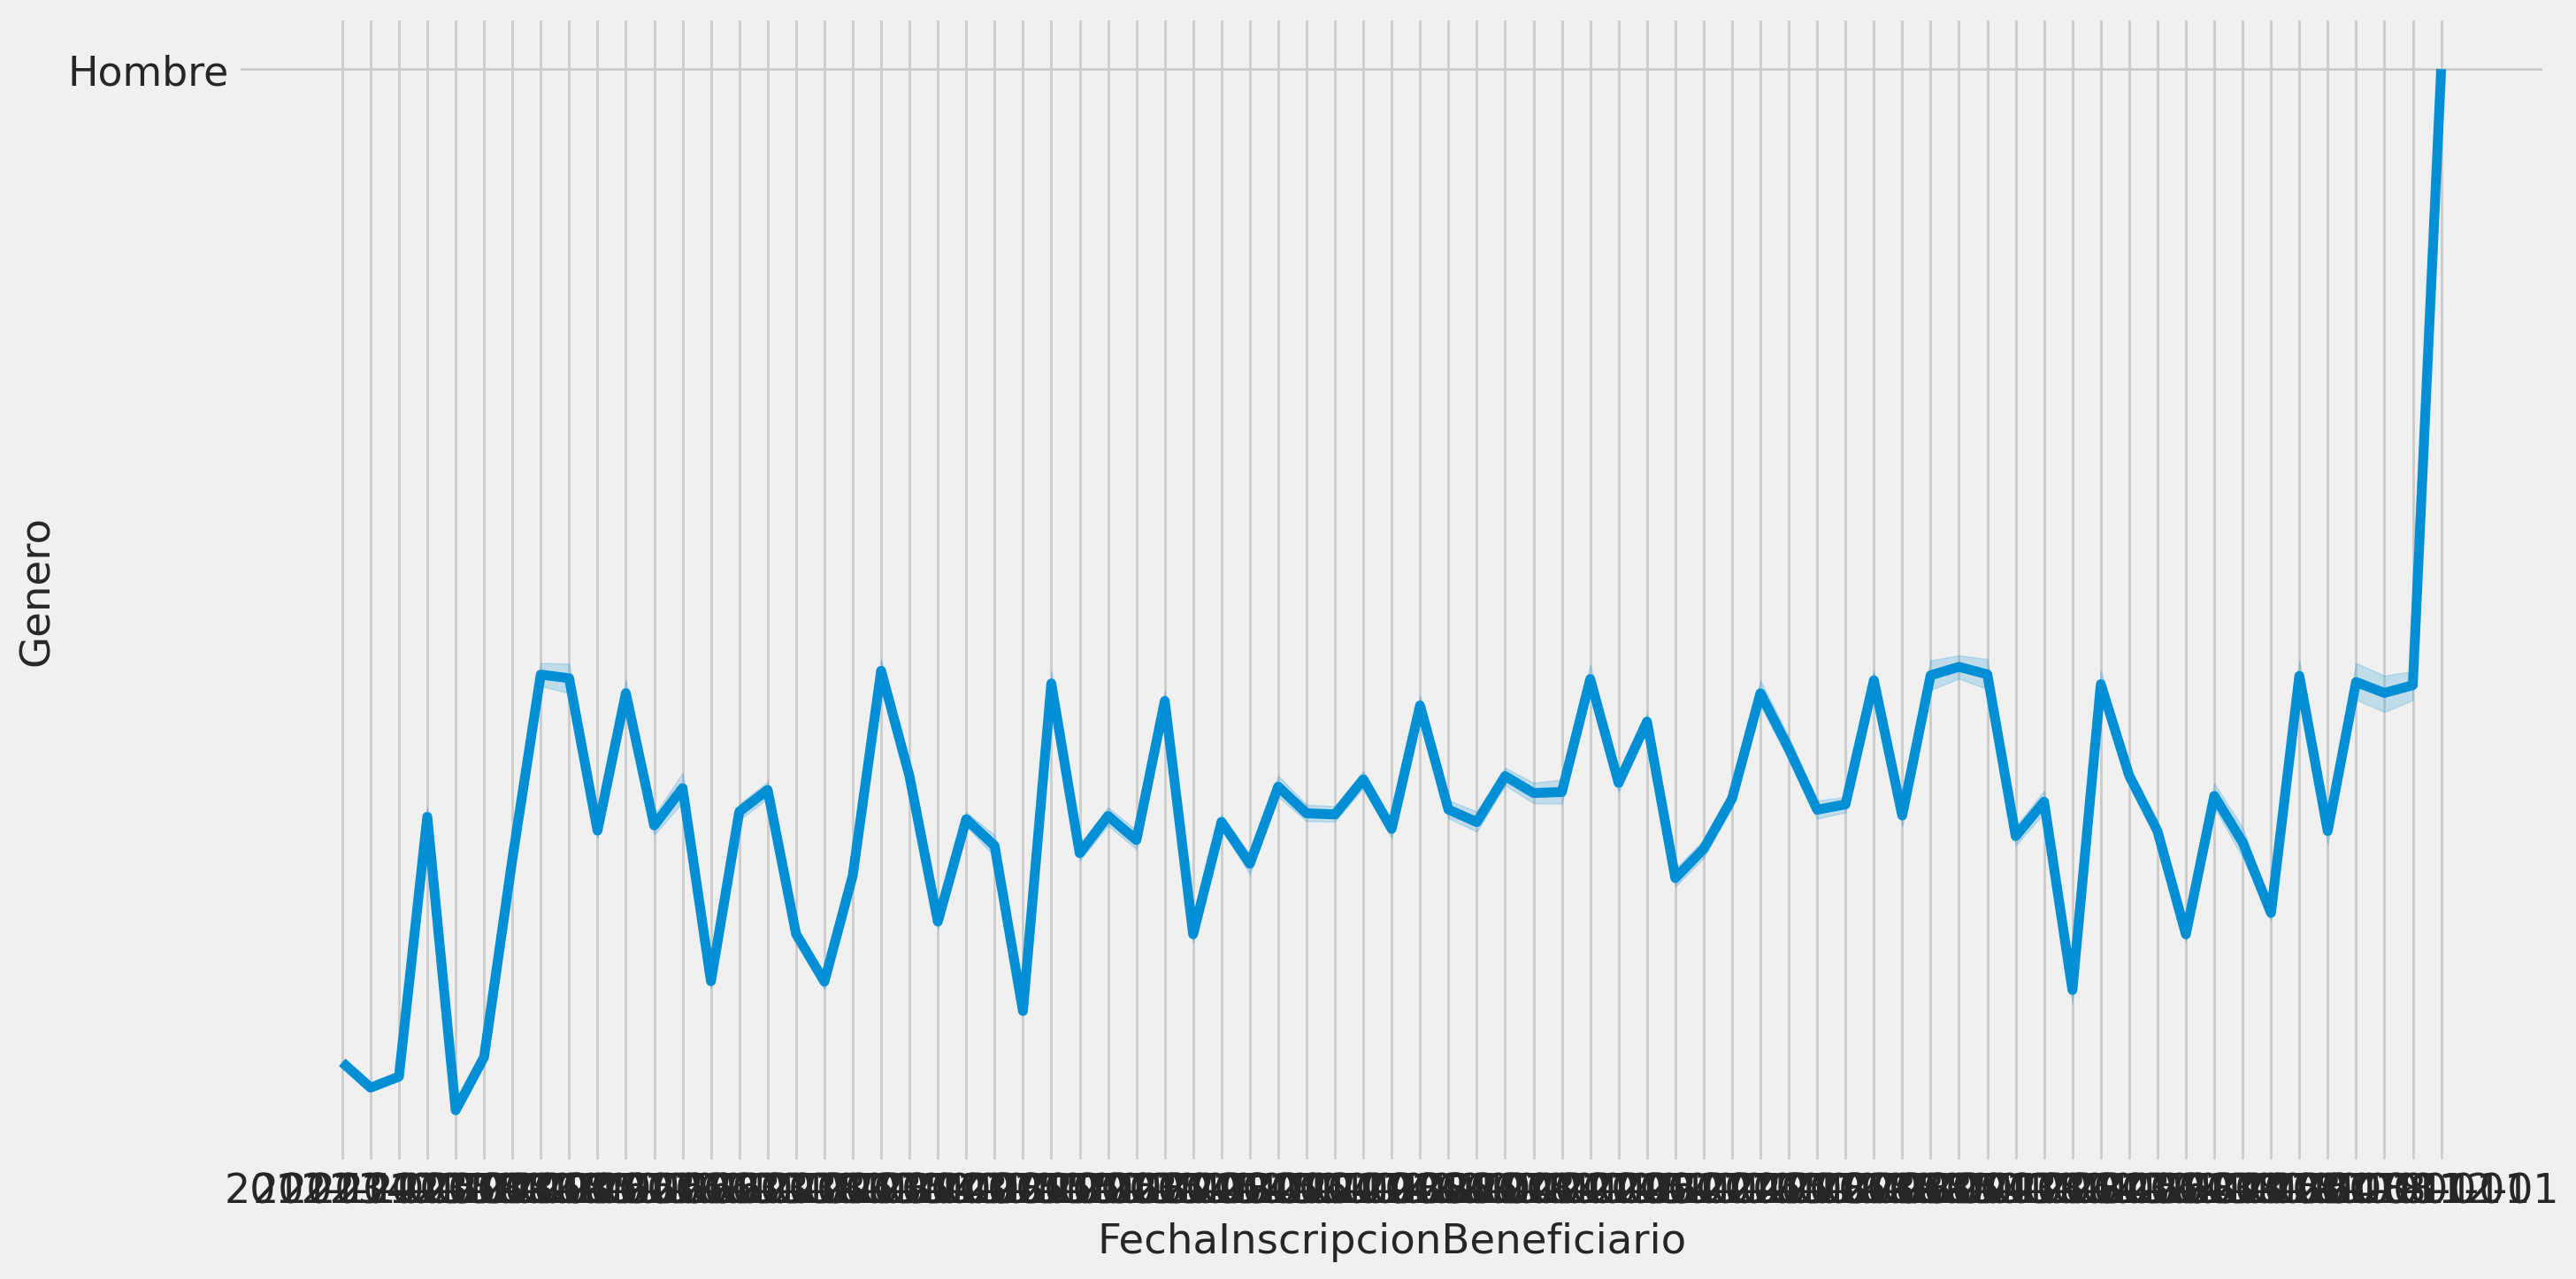

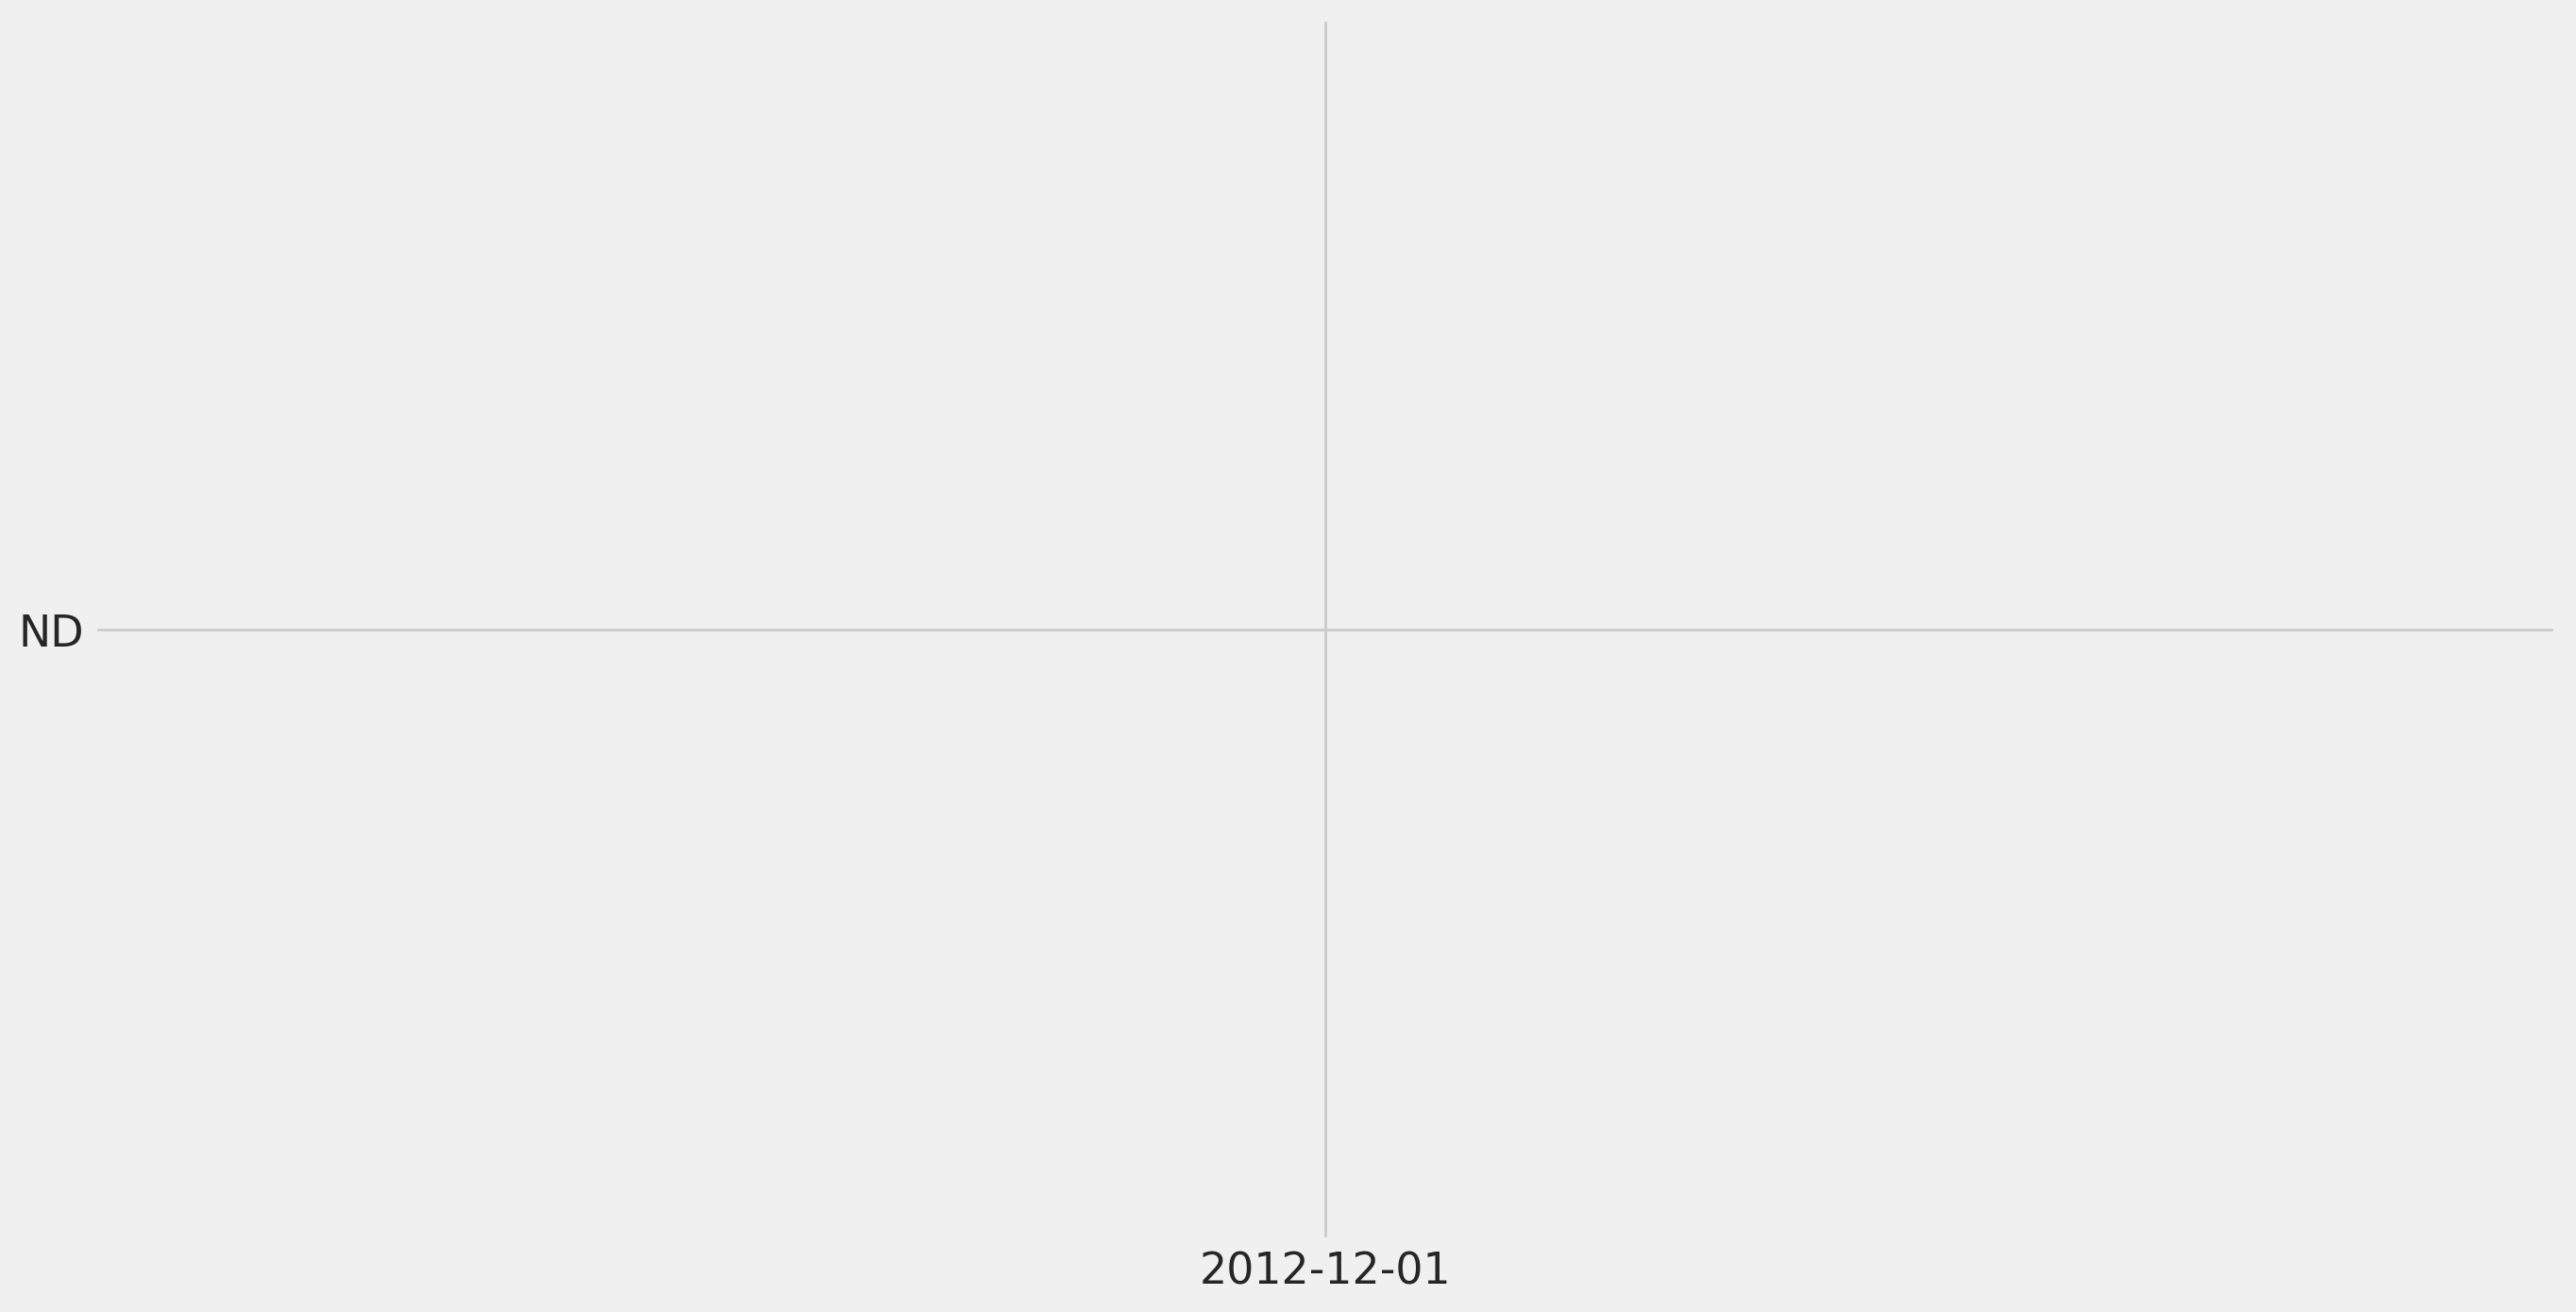

In [ ]:
def plot_data(col):
    plt.figure(figsize=(15,8))
    sns.lineplot(y=col ,x='FechaInscripcionBeneficiario',data=df)
    
    
for col in df.columns:
    plot_data(col)